# ***INM427*** Neural Network Coursework

***Name:*** **Mussa Yousef**              
***Course:*** **MSc Data Science**

**Neural networks project studying two neural network algorithms which predict the quality of White Wine using their phsicochemical composition. We will be comparing the application of both Multilayer Perceptron (MLP) and Support vector machines(SVM)**

***Dataset:***
**Wine Quality Dataset from the UCI Machine Learning Repository.**

Pipeline: 

1) Data Preprocessing and investigation 
    
2) Modelling
   - Build and apply both **mutually exclusive** MLP and SVM 
    
3) Assess results
   - Hyperparameter tuning **mutually exclusive**
    
4) Further training
    
5) Examine Model performance by testing and compare the models    

# Data PreProcessing and Investigation

In [2]:
#Import all libraries needed will contiously add to this list
#when a new library is needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
%matplotlib inline
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision
from torch.autograd import Variable
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
import math
import torch.nn.functional as F #ReLu #Tanh...Etc
import pickle
import time , timeit
device = 'cpu'

In [2]:
#for reproducibility
random.seed(123123123123123123123123)

In [3]:
df=pd.read_csv('winequality-white (1).csv',delimiter=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [1797]:
df.isnull().sum()
#Brilliant to see no missing data which I would need to investigate replacement 
#Lets get to work!

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#corr check between variavles usng seaborn
sns.pairplot(df)
#plt.savefig('pairplot.png')

No correlation seen between the categories visually a few mild positive relation however most seem to be skewed lets try comparing relation via heatmap

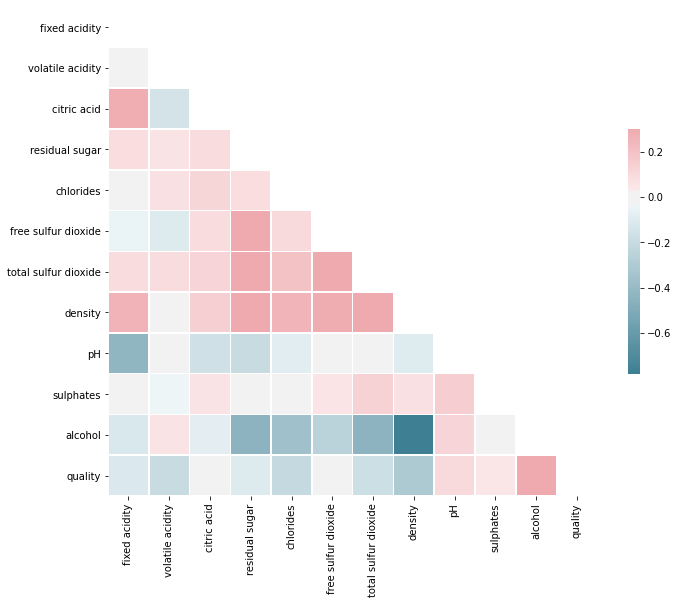

In [1799]:
#upper triangle relationship between 
corr= df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('save_as_a_png.png')

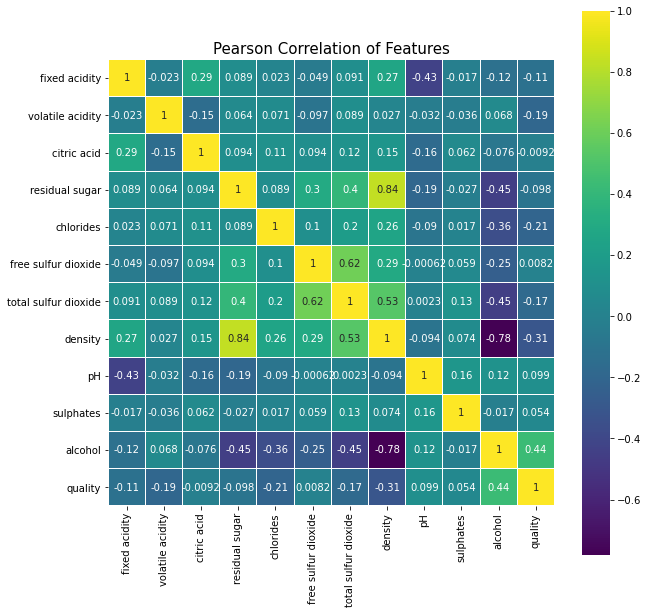

In [1800]:
# Pearson's Correlation Matrix
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1,cmap=colormap, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()

Looking at the heat map we see that most of the variable show a relation with output variable however as we 12 variables we would like to tailor our dataset to allow the best possible outcome when building our Neural networks algorithms therefore dropping those will be ideal. However as Neural networks are deals with data much faster then ML algorithmns I will leave these in. This will distort the data slightly however will enable greater understanding and allow us to try different hyperparameters to see the affects on the predictions

In [1801]:
# table-based unique. Uniques are returned in order of appearance.

#Significantly faster than numpy.unique. Includes NA values.

df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})


(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

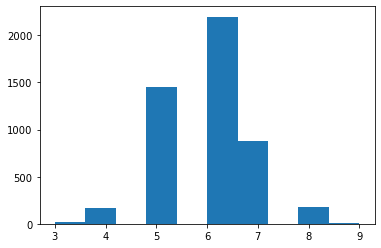

In [1802]:
from collections import Counter
import matplotlib.pyplot as plt
print(Counter(df['quality']))
plt.hist(df.quality)
#plt.savefig('FeatureReduction1.png')

#Counter({3: 20, 4: 163,5: 1457,6: 2198,7: 880, 8: 175,  9: 5})

#4898 Total 

#3:0.4% , 4:3.3% , 5:29.7%, 6:44.9%, 7:18%, 8:3.57%,9:0.1% 

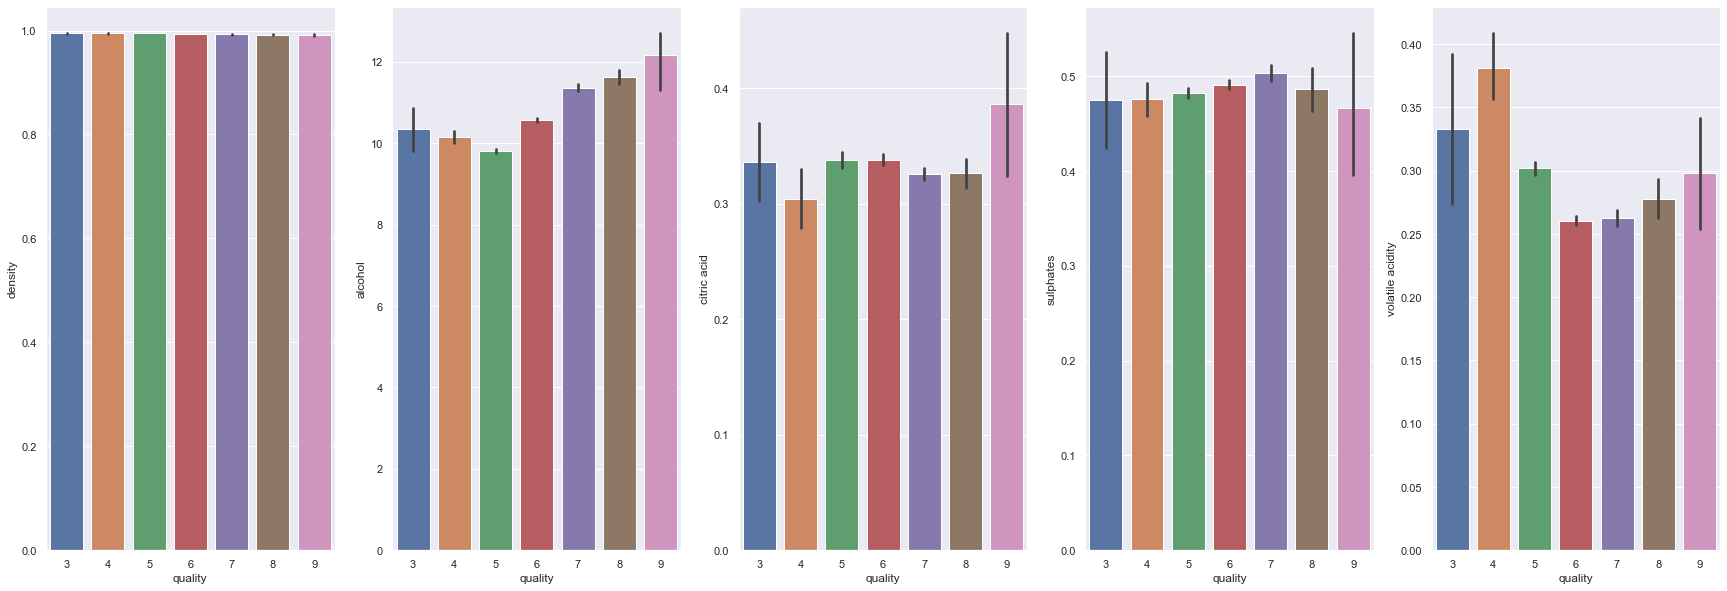

In [5]:
f, axes = plt.subplots(1, 5)

sns.set(rc={'figure.figsize':(30,10)})
#sns.barplot(  y="fixed acidity", x= "quality", data=df, ax=axes[0])

sns.barplot(  y="volatile acidity", x= "quality", data=df,  orient='v' , ax=axes[4])

sns.barplot(  y="citric acid", x= "quality", data=df, ax=axes[2])

sns.barplot(  y="sulphates", x= "quality", data=df, ax=axes[3])

sns.barplot(  y="density", x= "quality", data=df,  orient='v' , ax=axes[0])

sns.barplot(  y="alcohol", x= "quality", data=df,  orient='v' , ax=axes[1])

#plt.savefig('HistogramTSDandAL.png')

Density seems to be minimal variance across the quality of wine *interesting* seems to show that regardless of quality of wine the density of the wine is maintained

As we currently have 7 different quality labels; we will change this to only have two to make it easier to model:

**Bad Quality** = [0] = Bin[0-5] = 78.3% of labels

**Good Quality** [1] = Bin [7-10]= 21.67% of labels

Allows a approx a normal distribution across dataset

Clearly we have a class imbalance between the quality of wine classes. We see that there are 3 times more bad samples than good samples. Potentially we could use undersampling or SMOTE Method. As we aim to use the SVM method oversampling would affect our decision boundary albeit we would be able to attain a better model this would be explored in our report as a trade off.
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [4]:
import pandas as pd
bins=[0,6,10]

labels=[0,1]

df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

Counter({0: 3838, 1: 1060})


Text(0, 0.5, 'Counts')

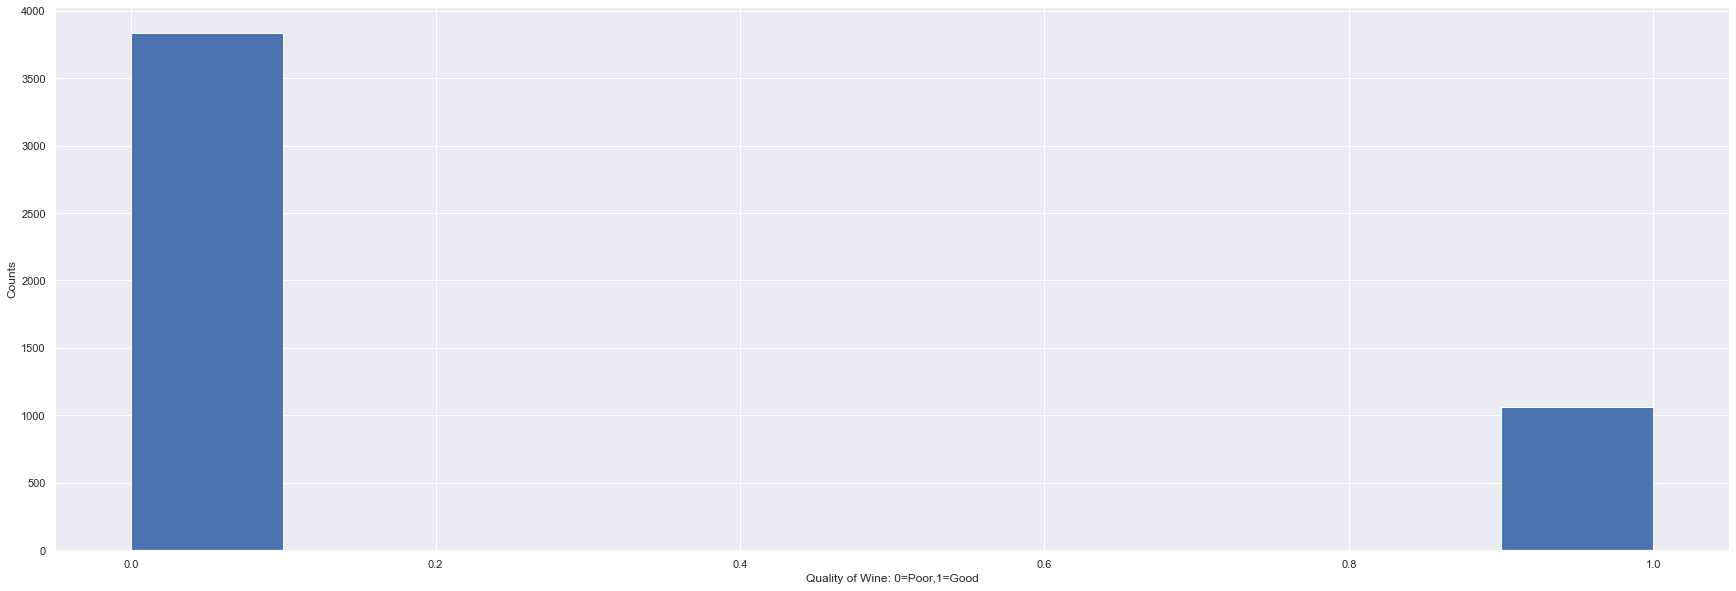

In [7]:
from collections import Counter
import matplotlib.pyplot as pyplot
print(Counter(df['quality']))
plt.hist(df['quality'])
pyplot.xlabel('Quality of Wine: 0=Poor,1=Good')
pyplot.ylabel('Counts')
#plt.savefig('FeatureReduction2.png')

In [1806]:
df.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.169614
dtype: float64

Variance for ***residual Sugar,free sulfur dioxide,total sulfur dioxide*** seems to be way off and out of bounds compared to the others, we will handle theses by Normalising the data so our neural network isn't cut off later on maximising our possibility to generalise our system

SMOTE

In [5]:
df.shape

(4898, 12)

In [5]:
df1=np.array(df)

In [9]:
features = df1[:,:-1]
labels = df1[:,-1]

In [1810]:
features = df.filter(items=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
labels = df["quality"]

In [1811]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [1812]:
labels

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: category
Categories (2, int64): [0 < 1]

In [11]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

In [12]:
counter=Counter(labels)

In [13]:
counter

Counter({0: 3838, 1: 1060})

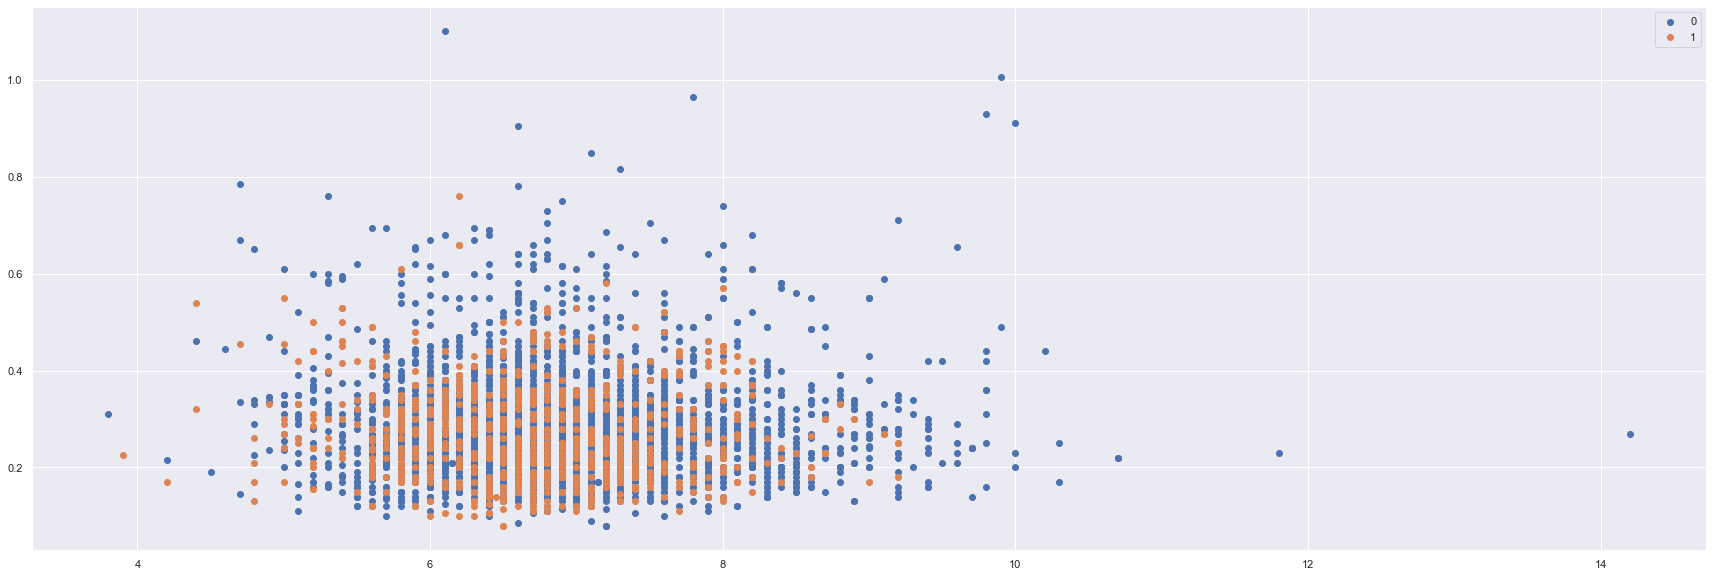

In [16]:
# scatter plot of class label
for label, _ in counter.items():
    row_ix = where(labels==label)[0]
    pyplot.scatter(features[row_ix, 0], features[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

large majority of the class is encapsulated within the greater class (Bad) this makes the components within the data difficult to differentiate therefore although oversampling wouldn't have too much impact on the decision boundary we must consider than the smote would work perticularly well in training our neural network

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
oversample = SMOTE()

**NOTE!** ***BEFORE we oversample our data we must split our training and testing set. This will allow us to catalise on fruitul data to train our Neural network with while making sure we keep our 'raw' data for testing using synthetic data when testing will over estimate our performance during testing which will not provide true performce indication***

In [10]:
features = features.astype('float32')
labels = labels.astype('int64')

In [11]:
# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

In [12]:
#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [ ]:
#We keep x_test and y_test for later

In [13]:
y_train=y_train.astype('int64')
x_train=x_train.astype('float32')

In [14]:
X, y = oversample.fit_resample(x_train,y_train)

In [15]:
x_smote_train, y_smote_train = oversample.fit_resample(x_train,y_train)

In [ ]:
Counter(y)

In [ ]:
X.shape

In [ ]:
y.shape

In [23]:
counter=Counter(y)

We find an increase in both features and labels lets see how this now looks graphically

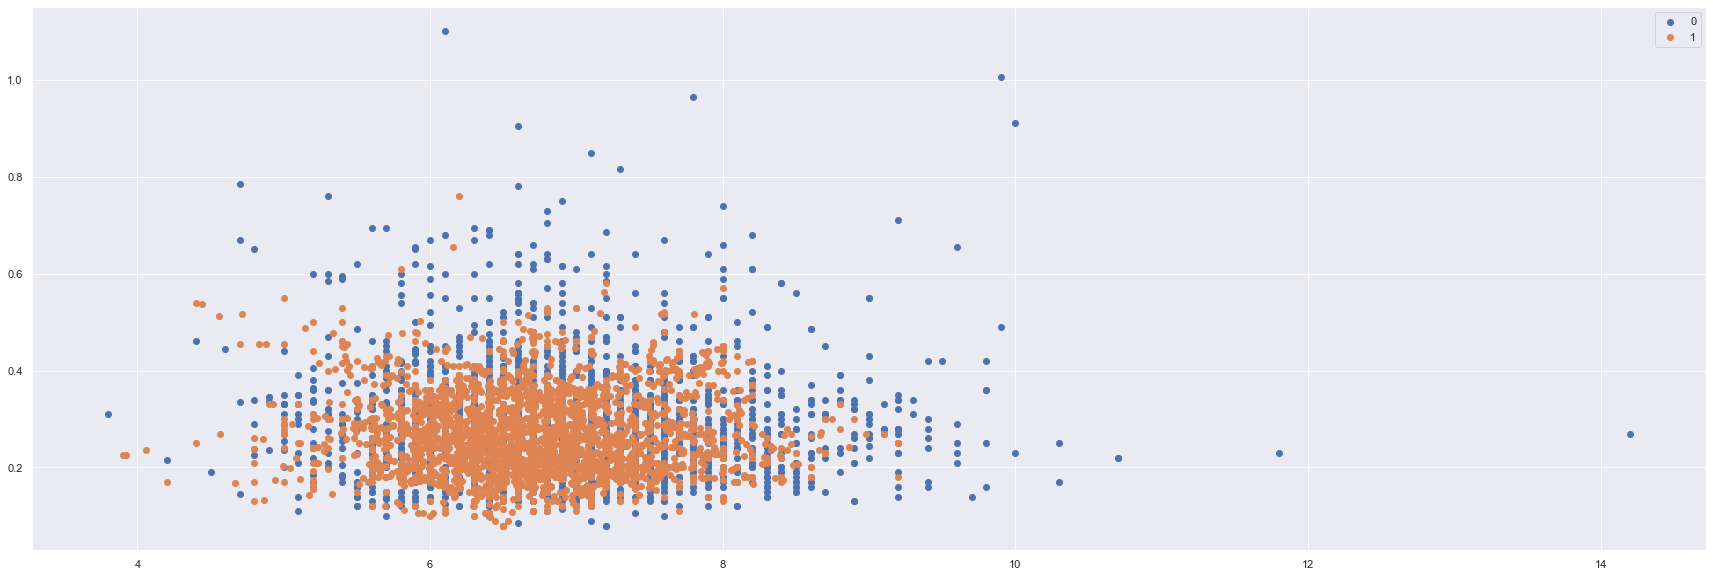

In [24]:
# scatter plot of class label
for label, _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 3072, 1: 3072})


Text(0, 0.5, 'Counts')

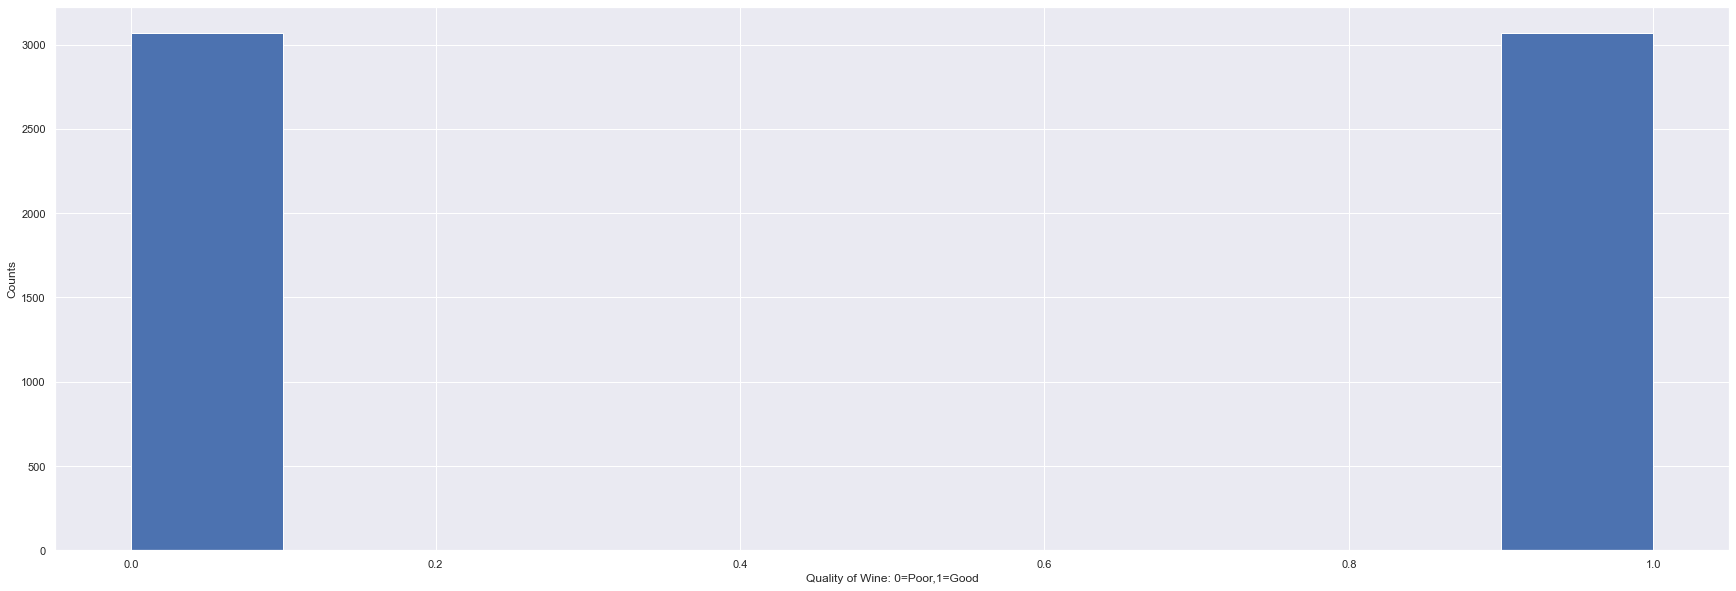

In [25]:
print(Counter(y))
plt.hist(y)
pyplot.xlabel('Quality of Wine: 0=Poor,1=Good')
pyplot.ylabel('Counts')
#plt.savefig('FeatureReduction2.png')

Counter({0: 766, 1: 214})


Text(0, 0.5, 'Counts')

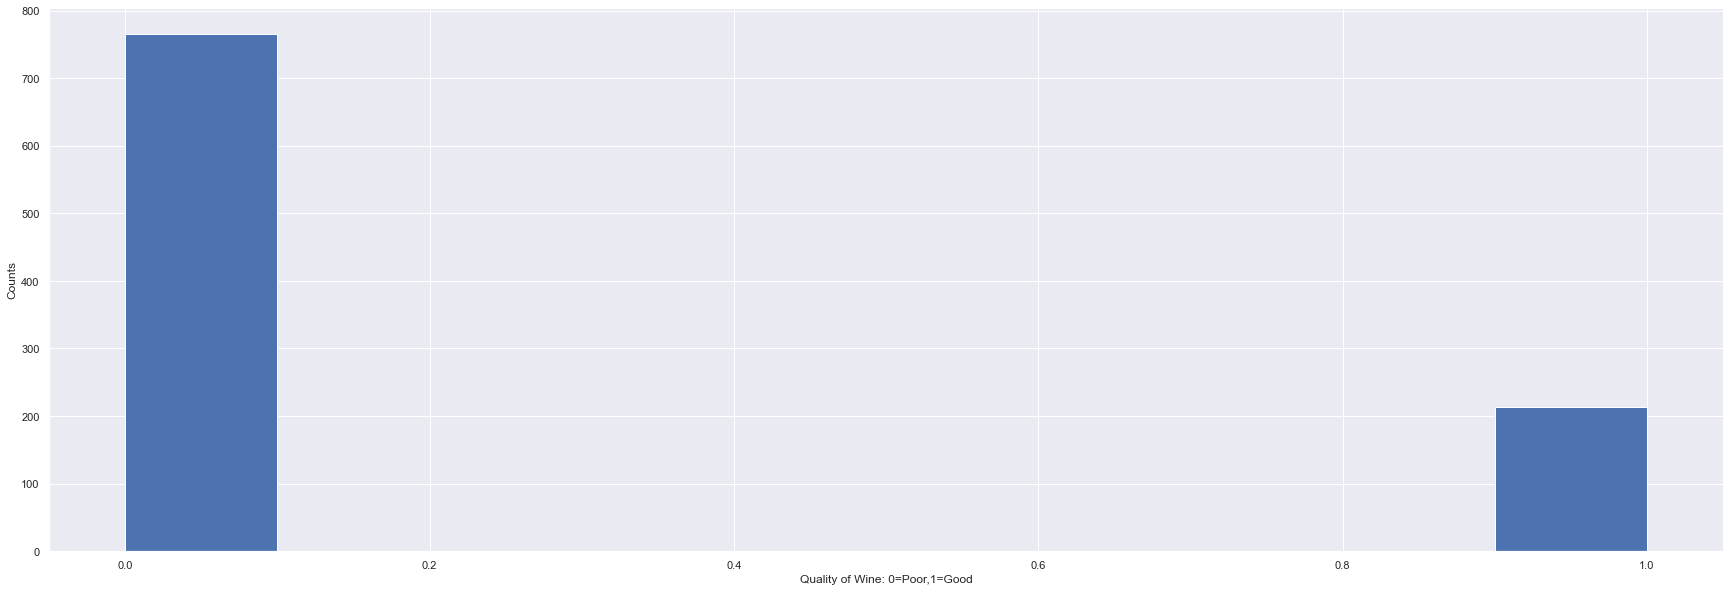

In [26]:
print(Counter(y_test))
plt.hist(y_test)
pyplot.xlabel('Quality of Wine: 0=Poor,1=Good')
pyplot.ylabel('Counts')

Surface area of imbalanced class within limits and bounded we can that the SMOTE process has balanced our Training DATASET!

MODEL

In [ ]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')


#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [ ]:
#NORMALISE FEATURES
#normalise features to 0,1
#from sklearn.preprocessing import MinMaxScaler
#features_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
#Convert our labels into two encoded classes to run through the Neural network
#from keras.utils.np_utils import to_categorical
#target_exp = to_categorical(y)
#target_exp

In [27]:
#Check before normalise
x_test

array([[ 5.  ,  0.33,  0.16, ...,  3.48,  0.44, 10.7 ],
       [ 7.  ,  0.23,  0.26, ...,  3.22,  0.55,  9.5 ],
       [ 6.3 ,  0.48,  0.48, ...,  3.49,  0.74, 12.2 ],
       ...,
       [ 8.5 ,  0.24,  0.47, ...,  3.02,  0.66,  9.  ],
       [ 7.2 ,  0.23,  0.39, ...,  2.98,  0.48,  9.  ],
       [ 6.8 ,  0.16,  0.29, ...,  3.2 ,  0.4 , 10.8 ]], dtype=float32)

In [28]:
#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [ ]:
#after normalise
x_test

In [29]:
x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')

In [ ]:
# train test split. Size of train data is 80% and size of test data is 20%. 
#x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.3,random_state = 42) 

In [30]:
# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

In [ ]:
targetsTrain.shape

In [31]:
# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

In [ ]:
targetsTest.shape

In [32]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [35]:
# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

## Prior to building the neural networks we will keep our parameters at baseline to be able to investigate and allow examination of how our model performing against tuning our parameters

## Initial Parameters

**Parameters:**

***Number of labels***
output_size = 2

***Number of features***
input_size = 11

***Number of hidden layers*** 
Hidden = 3


***Number of iterations (Epochs) will kept to default***
num_epochs=100

***Rate at which the computer learns our data input*** (default)
learning_rate = 0.001

**Alpha momentum at which factor is multiplied with the gradient of the previous epoch** ***NOTES: When alpha is close to 0, the neural net will engage in more conservative weight modifications, and when it is close to 1, it will make more radical weight modifications. A neural net that uses this rule is known as a perceptron, and this rule is called the perceptron learning rule.*** - defined as **w(t) := w(t) - (grad(t) + alpha*grad(t-1))** - this will be kept to 

alpha=0 -> Default

*** NOTES: Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less. The obvious case where you'd shuffle your data is if your data is sorted by their class/target.***
**Changes the training data each epoch hence increases generalisation**

Shuffling= True




# FIRST attept building a forward loop and using autograd backpropagation


We wiil implement all three
- ReLU
- Tanh
- ELU

to see how they all perform together

In [36]:
#We will try a variety of hidden layers on our first perceptron loop
n_hidden=3
input_dim=11
output_dim=2

In [37]:
class NeuralNet(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        #dropout=0.5
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.fc2(x2)
        x4 = self.tanh2(x3)
        x5 = self.fc3(x4)
        x6 = self.elu3(x5)
        out = self.fc4(x6)
        return out

In [38]:
# Create Model
model = NeuralNet(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [39]:
#np_array = np.array(data)
#x_np = torch.from_numpy(np_array)

In [40]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = 100

In [41]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.5957603454589844  Accuracy: 78.4073486328125 %
Iteration: 1000  Loss: 0.5984911918640137  Accuracy: 78.4073486328125 %
Iteration: 1500  Loss: 0.5427954196929932  Accuracy: 78.4073486328125 %
Iteration: 2000  Loss: 0.5895017981529236  Accuracy: 78.4073486328125 %
Iteration: 2500  Loss: 0.5298977494239807  Accuracy: 78.4073486328125 %
Iteration: 3000  Loss: 0.5919788479804993  Accuracy: 78.4073486328125 %
Iteration: 3500  Loss: 0.5267555117607117  Accuracy: 78.4073486328125 %
Iteration: 4000  Loss: 0.5949655175209045  Accuracy: 78.4073486328125 %




We see accuracy capped at from 78.4% interesting that we also get a 10% decrease in loss however these figures are far from ideal I have a stong feeling my model is predicting rather than generalising, lets try change our parameters

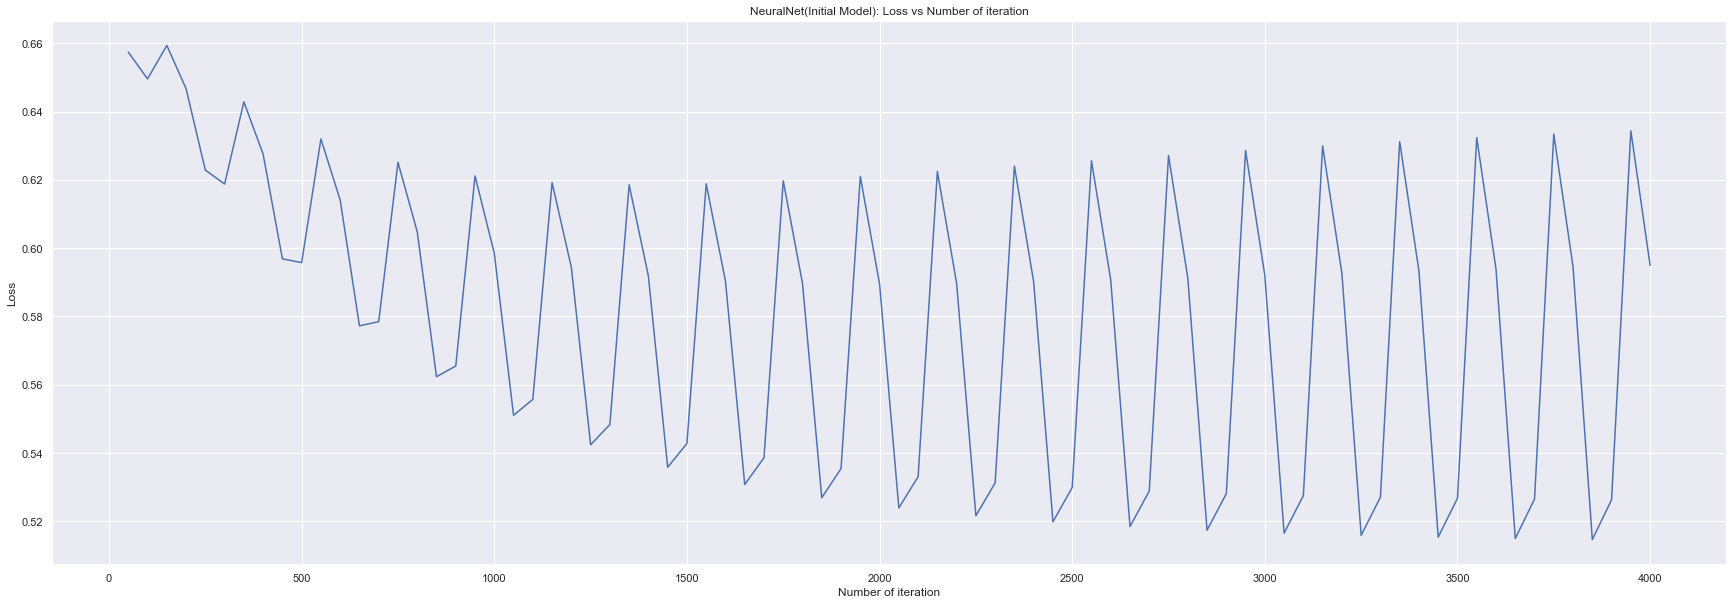

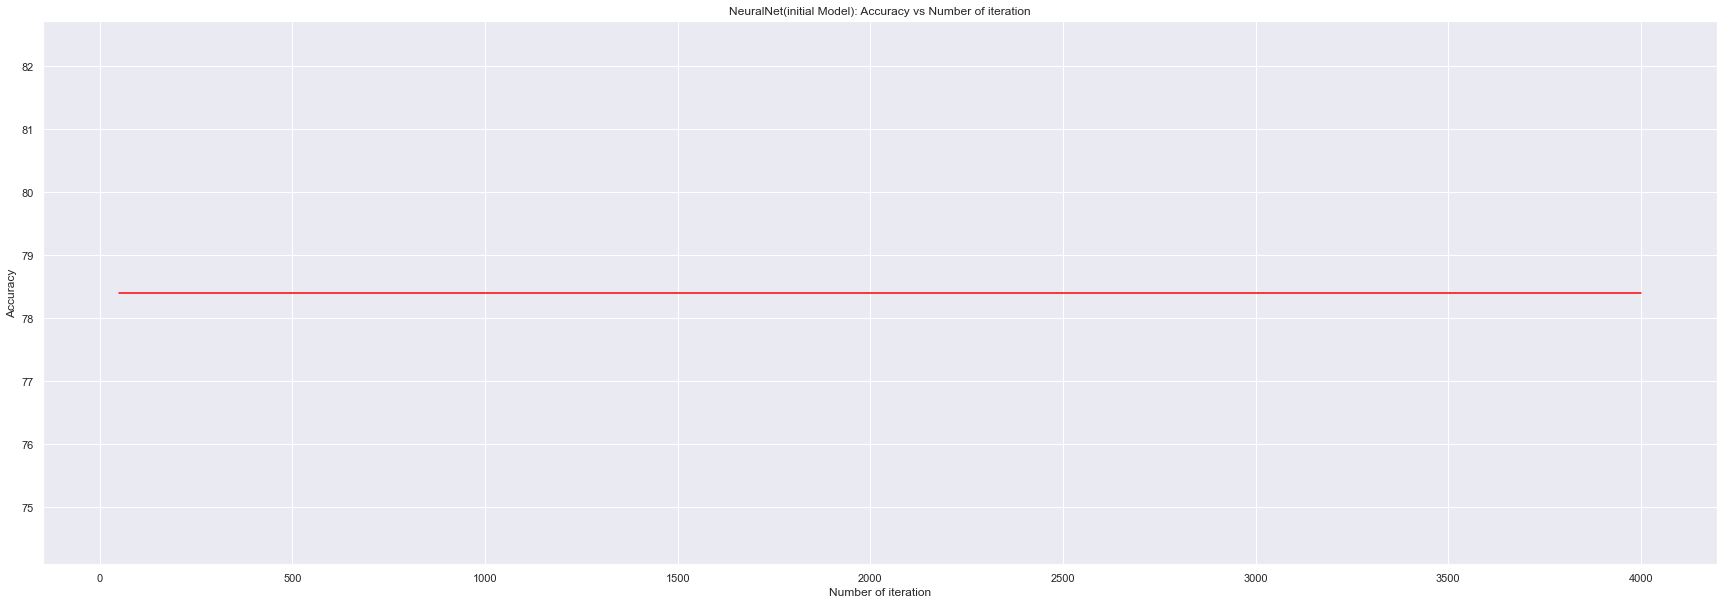

In [42]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NeuralNet(Initial Model): Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("NeuralNet(initial Model): Accuracy vs Number of iteration")
plt.show()

Interesting, a lot to work with we have an Iratic model performance here, we see that the number of iteration increase tends to affect our model intensively however a positive to point out is that our accuracy does have a positive trend however as it reaches 'certain value' we find a cut off point. could it be worth introducing a different activation or potentially a cut off value. -> let the games begin

# SECOND attempt - Introduce dropout

here we will add a dropout and keep everything else the same to see how this would impact our model

In [43]:
class NeuralNet1(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet1,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        dropout=0.5
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.fc2(x2)
        x4 = self.tanh2(x3)
        x5 = self.fc3(x4)
        x6 = self.elu3(x5)
        out = self.fc4(x6)
        return out

In [44]:
# Create Model
model1 = NeuralNet1(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

In [45]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model1(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model1(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.5271010398864746  Accuracy: 78.4073486328125 %
Iteration: 1000  Loss: 0.6007508039474487  Accuracy: 78.4073486328125 %
Iteration: 1500  Loss: 0.5269311666488647  Accuracy: 78.4073486328125 %
Iteration: 2000  Loss: 0.6010129451751709  Accuracy: 78.4073486328125 %
Iteration: 2500  Loss: 0.5269251465797424  Accuracy: 78.4073486328125 %
Iteration: 3000  Loss: 0.6010081171989441  Accuracy: 78.4073486328125 %
Iteration: 3500  Loss: 0.5269172191619873  Accuracy: 78.4073486328125 %
Iteration: 4000  Loss: 0.6009989976882935  Accuracy: 78.4073486328125 %


Terrible dropout-> we have increased our loss of our model while also decreasing our accuracy which is appauling here this could be potentially due to the 3 different activation functions used. As the system learns a redundant representation model overlooking our activations which seen in our first attempt worked well


WE will revisit dropout in our latter attempts using a greater number of hidden layers


# THIRD - Only ReLU

Lets look at how each activation function impacts our model 
- here we will on use ReLU

In [46]:
class NeuralNet3(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet3,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.fc2(x2)
        x5 = self.fc3(x3)
        out = self.fc4(x5)
        return out

In [47]:
# Create Model
model3 = NeuralNet3(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)

In [48]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model3(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model3(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.5997899770736694  Accuracy: 78.4073486328125 %
Iteration: 1000  Loss: 0.5957086086273193  Accuracy: 78.4073486328125 %
Iteration: 1500  Loss: 0.5372806787490845  Accuracy: 78.4073486328125 %
Iteration: 2000  Loss: 0.588825523853302  Accuracy: 78.4073486328125 %
Iteration: 2500  Loss: 0.5264848470687866  Accuracy: 78.4073486328125 %
Iteration: 3000  Loss: 0.5929669737815857  Accuracy: 78.4073486328125 %
Iteration: 3500  Loss: 0.5248042941093445  Accuracy: 78.4073486328125 %
Iteration: 4000  Loss: 0.5957074761390686  Accuracy: 78.4073486328125 %


This is poor we will go back to our initial Model and leave it unchanged from here! we will rather examine our parameters and see how this impacts our Model, we will now see how the learning rate and batch size affects our model

# FOURTH attempt - Choosing the best learning rate

In [49]:
class NeuralNet(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        #dropout=0.5
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.fc2(x2)
        x4 = self.tanh2(x3)
        x5 = self.fc3(x4)
        x6 = self.elu3(x5)
        out = self.fc4(x6)
        return out

In [50]:
# Create Model
model = NeuralNet(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [51]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = 100

In [52]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model1(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.5808446407318115  Accuracy: 78.4073486328125 %
Iteration: 1000  Loss: 0.5954717397689819  Accuracy: 78.4073486328125 %
Iteration: 1500  Loss: 0.5393872261047363  Accuracy: 78.4073486328125 %
Iteration: 2000  Loss: 0.5910634994506836  Accuracy: 78.4073486328125 %
Iteration: 2500  Loss: 0.5299152135848999  Accuracy: 78.4073486328125 %
Iteration: 3000  Loss: 0.5940473079681396  Accuracy: 78.4073486328125 %
Iteration: 3500  Loss: 0.527614951133728  Accuracy: 78.4073486328125 %
Iteration: 4000  Loss: 0.5968561172485352  Accuracy: 78.4073486328125 %


# Using 0.001, 0.01 & 0.1 LR -< same result for all approx

Iteration: 500  Loss: 0.692353367805481  Accuracy: 50.120975494384766 %

Iteration: 1000  Loss: 0.693911075592041  Accuracy: 50.120975494384766 %

Iteration: 1500  Loss: 0.6930547952651978  Accuracy: 50.120975494384766 %

Iteration: 2000  Loss: 0.6932517886161804  Accuracy: 50.120975494384766 %

Iteration: 2500  Loss: 0.693295955657959  Accuracy: 50.120975494384766 %

Iteration: 3000  Loss: 0.6939613819122314  Accuracy: 50.120975494384766 %

Iteration: 3500  Loss: 0.6934793591499329  Accuracy: 50.120975494384766 %

Iteration: 4000  Loss: 0.6931338310241699  Accuracy: 50.120975494384766 %

Iteration: 4500  Loss: 0.6912370920181274  Accuracy: 50.120975494384766 %

Iteration: 5000  Loss: 0.6950184106826782  Accuracy: 50.120975494384766 %


No real changing in learning rate we will keep it to 0.001 as per our first model test


# Fifth ->  increasing our hidden dimension

We will revert back to the initial model->> here we will change our hidden dimension from 3->6 and see how this affects our model

In [53]:
#We will try a variety of hidden layers on our first perceptron loop
n_hidden=100
input_dim=11
output_dim=2

In [54]:
# batch_size, epoch and iteration
batch_size = 50
n_iters = 10000
num_epochs = 100

In [55]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.5270593166351318  Accuracy: 78.4073486328125 %
Iteration: 1000  Loss: 0.5986578464508057  Accuracy: 78.4073486328125 %
Iteration: 1500  Loss: 0.5269375443458557  Accuracy: 78.4073486328125 %
Iteration: 2000  Loss: 0.599696934223175  Accuracy: 78.4073486328125 %
Iteration: 2500  Loss: 0.5269181728363037  Accuracy: 78.4073486328125 %
Iteration: 3000  Loss: 0.6002706289291382  Accuracy: 78.4073486328125 %
Iteration: 3500  Loss: 0.5269195437431335  Accuracy: 78.4073486328125 %
Iteration: 4000  Loss: 0.6005796790122986  Accuracy: 78.4073486328125 %


Trial hidden layers & batches

# 10 Hidden layers & 100 Batches

Iteration: 500  Loss: 0.693208634853363  Accuracy: 51.796016693115234 %
Iteration: 1000  Loss: 0.6929605007171631  Accuracy: 51.53545379638672 %
Iteration: 1500  Loss: 0.6909955739974976  Accuracy: 51.81462860107422 %
Iteration: 2000  Loss: 0.6909543871879578  Accuracy: 51.74018096923828 %
Iteration: 2500  Loss: 0.6929494738578796  Accuracy: 52.26130676269531 %
Iteration: 3000  Loss: 0.6941602826118469  Accuracy: 52.0007438659668 %
Iteration: 3500  Loss: 0.6940560340881348  Accuracy: 52.1124153137207 %
Iteration: 4000  Loss: 0.6893984079360962  Accuracy: 52.428810119628906 %
Iteration: 4500  Loss: 0.6849815249443054  Accuracy: 53.02437973022461 %
Iteration: 5000  Loss: 0.6962176561355591  Accuracy: 53.50828170776367 %

# 10 Hidden Layers & 500 Batches

Iteration: 500  Loss: 0.699357807636261  Accuracy: 56.020843505859375 %
Iteration: 1000  Loss: 0.6832924485206604  Accuracy: 56.65363693237305 %
Iteration: 1500  Loss: 0.6681358814239502  Accuracy: 56.80253219604492 %
Iteration: 2000  Loss: 0.6894508600234985  Accuracy: 56.65363693237305 %
Iteration: 2500  Loss: 0.6773889064788818  Accuracy: 57.04448318481445 %
Iteration: 3000  Loss: 0.6821174621582031  Accuracy: 57.23059844970703 %
Iteration: 3500  Loss: 0.6902751922607422  Accuracy: 58.75674819946289 %
Iteration: 4000  Loss: 0.6705262064933777  Accuracy: 59.25925827026367 %
Iteration: 4500  Loss: 0.6498637199401855  Accuracy: 61.15763854980469 %
Iteration: 5000  Loss: 0.6438623070716858  Accuracy: 62.59073257446289 %


# 50 Hidden layers & 500 batches 

Iteration: 500  Loss: 0.6846840381622314  Accuracy: 63.87493133544922 %
Iteration: 1000  Loss: 0.6748950481414795  Accuracy: 64.15410614013672 %
Iteration: 1500  Loss: 0.6263524889945984  Accuracy: 65.23357391357422 %
Iteration: 2000  Loss: 0.6699983477592468  Accuracy: 65.34524536132812 %
Iteration: 2500  Loss: 0.6468132138252258  Accuracy: 65.64302825927734 %
Iteration: 3000  Loss: 0.6140264272689819  Accuracy: 66.25720977783203 %
Iteration: 3500  Loss: 0.6912811398506165  Accuracy: 66.44332885742188 %
Iteration: 4000  Loss: 0.6108133792877197  Accuracy: 66.36888122558594 %
Iteration: 4500  Loss: 0.6201125979423523  Accuracy: 66.66666412353516 %
Iteration: 5000  Loss: 0.5592858791351318  Accuracy: 65.51274871826172 %


# 100 Hidden layers & 500 batches 

Iteration: 500  Loss: 0.6500462889671326  Accuracy: 66.77833557128906 %
Iteration: 1000  Loss: 0.6813771724700928  Accuracy: 67.42974090576172 %
Iteration: 1500  Loss: 0.5974285006523132  Accuracy: 66.6852798461914 %
Iteration: 2000  Loss: 0.6538208723068237  Accuracy: 66.89000701904297 %
Iteration: 2500  Loss: 0.625781774520874  Accuracy: 67.59724426269531 %
Iteration: 3000  Loss: 0.5948836207389832  Accuracy: 65.97803497314453 %
Iteration: 3500  Loss: 0.7017882466316223  Accuracy: 67.87641906738281 %
Iteration: 4000  Loss: 0.6004818081855774  Accuracy: 68.769775390625 %
Iteration: 4500  Loss: 0.618358850479126  Accuracy: 68.47199249267578 %
Iteration: 5000  Loss: 0.5337093472480774  Accuracy: 65.0474624633789 %

# 150 Hidden layers & 500 batches

Iteration: 500  Loss: 0.6430468559265137  Accuracy: 67.46696472167969 %
Iteration: 1000  Loss: 0.6920222640037537  Accuracy: 68.54643249511719 %
Iteration: 1500  Loss: 0.5897332429885864  Accuracy: 68.08114624023438 %
Iteration: 2000  Loss: 0.6467889547348022  Accuracy: 67.5786361694336 %
Iteration: 2500  Loss: 0.6218870878219604  Accuracy: 68.9372787475586 %
Iteration: 3000  Loss: 0.5919894576072693  Accuracy: 66.852783203125 %
Iteration: 3500  Loss: 0.706412672996521  Accuracy: 69.328125 %
Iteration: 4000  Loss: 0.5923581719398499  Accuracy: 69.42118072509766 %
Iteration: 4500  Loss: 0.6115142107009888  Accuracy: 68.91867065429688 %
Iteration: 5000  Loss: 0.5284382104873657  Accuracy: 64.84273529052734 %

# 250 Hidden Layers & 500 batches 

Iteration: 500  Loss: 0.6404163241386414  Accuracy: 67.65308380126953 %
Iteration: 1000  Loss: 0.7092165946960449  Accuracy: 69.75618743896484 %
Iteration: 1500  Loss: 0.5834929943084717  Accuracy: 69.01172637939453 %
Iteration: 2000  Loss: 0.6349207162857056  Accuracy: 67.16918182373047 %
Iteration: 2500  Loss: 0.6197946071624756  Accuracy: 69.81201934814453 %
Iteration: 3000  Loss: 0.5996297597885132  Accuracy: 67.05751037597656 %
Iteration: 3500  Loss: 0.7072656154632568  Accuracy: 69.94230651855469 %
Iteration: 4000  Loss: 0.5845633745193481  Accuracy: 69.8492431640625 %
Iteration: 4500  Loss: 0.598076581954956  Accuracy: 68.80699920654297 %
Iteration: 5000  Loss: 0.5138004422187805  Accuracy: 65.494140625 %

# 150 hidden Layer & 200 batches

Iteration: 500  Loss: 0.6387149691581726  Accuracy: 67.82058715820312 %
Iteration: 1000  Loss: 0.7284851670265198  Accuracy: 68.6581039428711 %
Iteration: 1500  Loss: 0.576977014541626  Accuracy: 69.73757934570312 %
Iteration: 2000  Loss: 0.6176536083221436  Accuracy: 67.67169189453125 %
Iteration: 2500  Loss: 0.6201674342155457  Accuracy: 69.66313171386719 %
Iteration: 3000  Loss: 0.6180179119110107  Accuracy: 67.52279663085938 %
Iteration: 3500  Loss: 0.7075299024581909  Accuracy: 70.16564178466797 %
Iteration: 4000  Loss: 0.5788898468017578  Accuracy: 69.71896362304688 %
Iteration: 4500  Loss: 0.5844658017158508  Accuracy: 69.45840454101562 %
Iteration: 5000  Loss: 0.49719011783599854  Accuracy: 66.35027313232422 %


# 100 hidden layers & 200 batches 

Iteration: 500  Loss: 0.6307764649391174  Accuracy: 68.50921630859375 %
Iteration: 1000  Loss: 0.7221922874450684  Accuracy: 68.54643249511719 %
Iteration: 1500  Loss: 0.570055365562439  Accuracy: 70.42620849609375 %
Iteration: 2000  Loss: 0.6046881079673767  Accuracy: 68.30448913574219 %
Iteration: 2500  Loss: 0.6188054084777832  Accuracy: 69.45840454101562 %
Iteration: 3000  Loss: 0.6231966614723206  Accuracy: 66.94583892822266 %
Iteration: 3500  Loss: 0.7102458477020264  Accuracy: 70.31453704833984 %
Iteration: 4000  Loss: 0.5736302733421326  Accuracy: 69.73757934570312 %
Iteration: 4500  Loss: 0.5791823267936707  Accuracy: 70.05397033691406 %
Iteration: 5000  Loss: 0.4898604452610016  Accuracy: 66.81555938720703 %
Iteration: 5500  Loss: 0.6143395900726318  Accuracy: 70.16564178466797 %
Iteration: 6000  Loss: 0.6234502196311951  Accuracy: 70.01675415039062 %
Iteration: 6500  Loss: 0.5484585762023926  Accuracy: 70.64954376220703 %
Iteration: 7000  Loss: 0.5955851078033447  Accuracy: 70.12841796875 %
Iteration: 7500  Loss: 0.6171126961708069  Accuracy: 67.63446807861328 %
Iteration: 8000  Loss: 0.6454968452453613  Accuracy: 70.5192642211914 %
Iteration: 8500  Loss: 0.5141528844833374  Accuracy: 70.12841796875 %
Iteration: 9000  Loss: 0.6430070996284485  Accuracy: 66.87139129638672 %
Iteration: 9500  Loss: 0.5016743540763855  Accuracy: 70.2400894165039 %
Iteration: 10000  Loss: 0.6375296115875244  Accuracy: 70.16564178466797 %


# 100 Hidden, 500 batches and 500 epochs

Iteration: 500  Loss: 0.6049860715866089  Accuracy: 70.4075927734375 %
Iteration: 1000  Loss: 0.6470797061920166  Accuracy: 70.72399139404297 %
Iteration: 1500  Loss: 0.5370295643806458  Accuracy: 70.9659423828125 %
Iteration: 2000  Loss: 0.5645197629928589  Accuracy: 70.77982330322266 %
Iteration: 2500  Loss: 0.6045711040496826  Accuracy: 70.98455047607422 %
Iteration: 3000  Loss: 0.60865318775177  Accuracy: 69.4025650024414 %
Iteration: 3500  Loss: 0.7062187790870667  Accuracy: 71.05899810791016 %
Iteration: 4000  Loss: 0.5365707278251648  Accuracy: 71.17066955566406 %
Iteration: 4500  Loss: 0.5473005771636963  Accuracy: 71.02177429199219 %
Iteration: 5000  Loss: 0.5148573517799377  Accuracy: 68.19281768798828 %


# 100 hidden, 500 batches and 100 epochs

Iteration: 500  Loss: 0.5920284986495972  Accuracy: 71.37539672851562 %
Iteration: 1000  Loss: 0.6263951659202576  Accuracy: 71.30094909667969 %
Iteration: 1500  Loss: 0.5113438963890076  Accuracy: 71.33817291259766 %
Iteration: 2000  Loss: 0.5504097938537598  Accuracy: 70.76121520996094 %
Iteration: 2500  Loss: 0.6042726635932922  Accuracy: 70.94732666015625 %
Iteration: 3000  Loss: 0.571519136428833  Accuracy: 71.15205383300781 %
Iteration: 3500  Loss: 0.7053332328796387  Accuracy: 71.44984436035156 %
Iteration: 4000  Loss: 0.5188161730766296  Accuracy: 70.77982330322266 %
Iteration: 4500  Loss: 0.5312322378158569  Accuracy: 71.02177429199219 %
Iteration: 5000  Loss: 0.5333715677261353  Accuracy: 67.54141235351562 %

# 100 Hidden, 400 batches and 100 epochs
Iteration: 500  Loss: 0.5871941447257996  Accuracy: 71.58012390136719 %
Iteration: 1000  Loss: 0.6261963844299316  Accuracy: 71.1334457397461 %
Iteration: 1500  Loss: 0.5102668404579163  Accuracy: 71.48706817626953 %
Iteration: 2000  Loss: 0.5455179810523987  Accuracy: 70.89149475097656 %
Iteration: 2500  Loss: 0.6056023836135864  Accuracy: 71.09622192382812 %
Iteration: 3000  Loss: 0.5689759254455566  Accuracy: 71.39400482177734 % *Stopping??
Iteration: 3500  Loss: 0.7032220363616943  Accuracy: 71.44984436035156 %
Iteration: 4000  Loss: 0.5169340968132019  Accuracy: 70.77982330322266 %
Iteration: 4500  Loss: 0.5270761251449585  Accuracy: 71.15205383300781 %
Iteration: 5000  Loss: 0.5345785021781921  Accuracy: 67.74613952636719 %

# 100 hidden 300 batches and 100 epochs

Iteration: 500  Loss: 0.5873538851737976  Accuracy: 71.6917953491211 %
Iteration: 1000  Loss: 0.629513680934906  Accuracy: 71.11483001708984 %
Iteration: 1500  Loss: 0.5097340941429138  Accuracy: 71.46845245361328 %
Iteration: 2000  Loss: 0.5399762988090515  Accuracy: 71.09622192382812 %
Iteration: 2500  Loss: 0.6050965785980225  Accuracy: 71.26372528076172 %
Iteration: 3000  Loss: 0.5649060010910034  Accuracy: 71.5987319946289 %
Iteration: 3500  Loss: 0.7008722424507141  Accuracy: 71.54290008544922 %
Iteration: 4000  Loss: 0.5145831108093262  Accuracy: 70.98455047607422 %
Iteration: 4500  Loss: 0.522727906703949  Accuracy: 71.22650146484375 %
Iteration: 5000  Loss: 0.5370176434516907  Accuracy: 68.06253814697266 %

# 100 hidden 50 batches and 100 epochs
Iteration: 500  Loss: 0.5740809440612793  Accuracy: 71.8779067993164 %
Iteration: 1000  Loss: 0.6315191388130188  Accuracy: 71.4126205444336 %
Iteration: 1500  Loss: 0.5070105195045471  Accuracy: 72.19430541992188 %
Iteration: 2000  Loss: 0.5335567593574524  Accuracy: 71.84068298339844 %
Iteration: 2500  Loss: 0.5988516807556152  Accuracy: 71.8779067993164 %
Iteration: 3000  Loss: 0.5578194260597229  Accuracy: 71.7662353515625 %
Iteration: 3500  Loss: 0.694652259349823  Accuracy: 71.74762725830078 %
Iteration: 4000  Loss: 0.50825035572052  Accuracy: 71.18927764892578 %
Iteration: 4500  Loss: 0.512007474899292  Accuracy: 71.44984436035156 %
Iteration: 5000  Loss: 0.5463417768478394  Accuracy: 69.10478210449219 %

# We have reached consistant state in accuracy however having around 50% loss isn't ideal why is this?? lets investigate


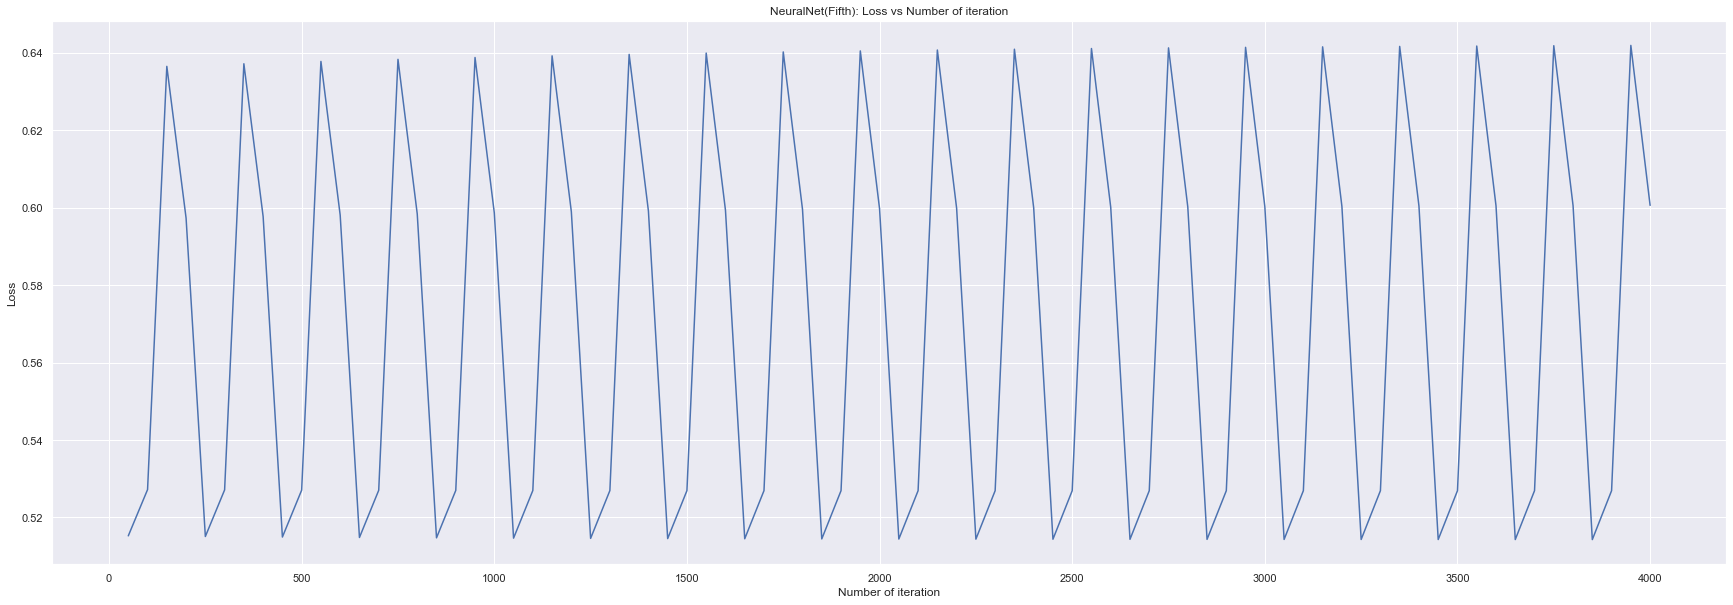

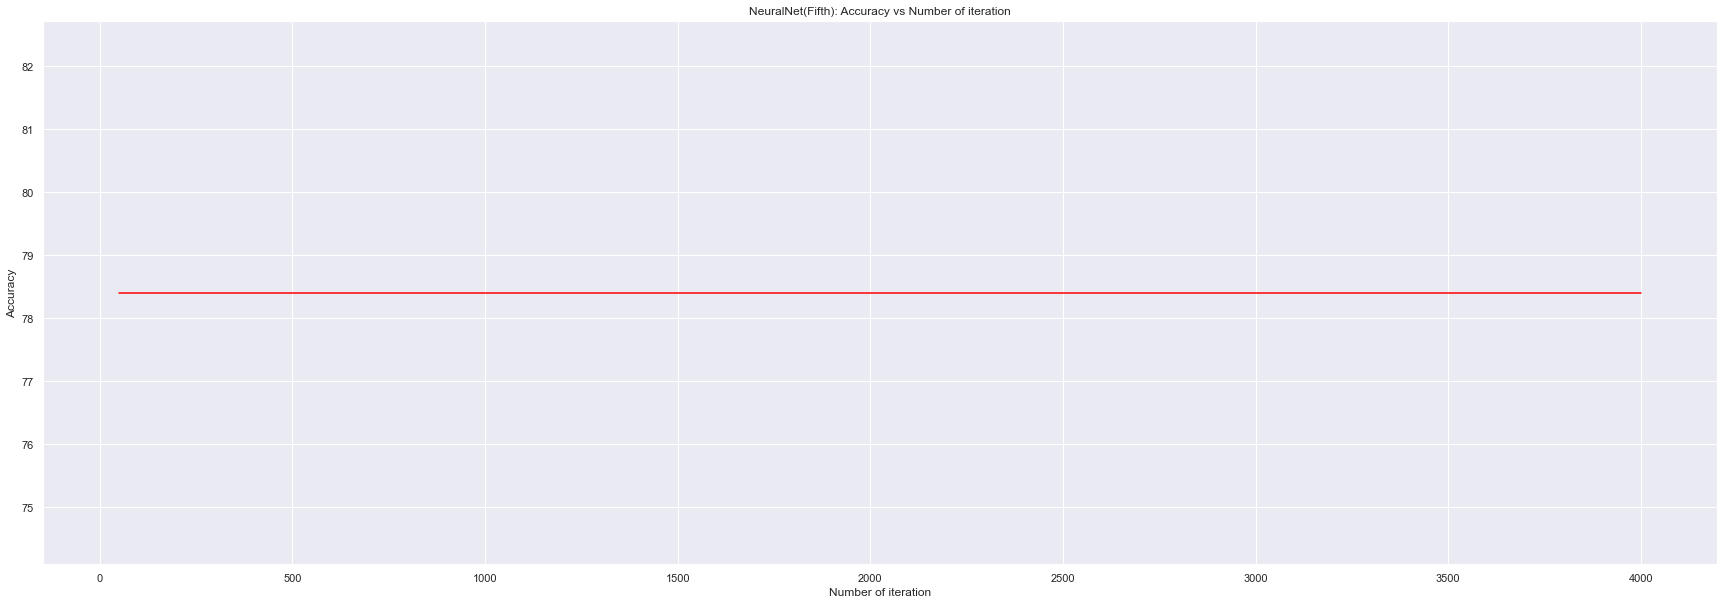

In [56]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NeuralNet(Fifth): Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("NeuralNet(Fifth): Accuracy vs Number of iteration")
plt.show()

This irregular repetitive behavior with the accuracy I suspect is due to the tanh activation function as it shares the same looping charateristics lets swap the tanh for the ReLU in our second hidden layer and see how this affects our training

# 6th attempt

Changing our tanh -> ReLu, changing our optimizer from SGD to Adam and adding weighting decay

In [57]:
class NeuralNet6(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet6,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        #dropout=0.5
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.fc2(x2)
        x4 = self.relu2(x3)
        x5 = self.fc3(x3)
        x6 = self.elu3(x5)
        out = self.fc4(x6)
        return out

In [58]:
# Create Model
model6 = NeuralNet6(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model6.parameters(), lr=learning_rate, weight_decay=0.001)

#weight decay lets us control the generalisation of the model

In [59]:
#We will try a variety of hidden layers on our first perceptron loop
n_hidden=250
input_dim=11
output_dim=2

In [60]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = 100

In [61]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
start_time=time.time()
for epoch in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model6(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model6(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
                end_time = time.time()
                print("Elapsed time was %g seconds" % (end_time - start_time))

Iteration: 500  Loss: 0.4198566675186157  Accuracy: 81.31700134277344 %
Elapsed time was 3.54372 seconds
Iteration: 1000  Loss: 0.44912800192832947  Accuracy: 81.82746124267578 %
Elapsed time was 6.59002 seconds
Iteration: 1500  Loss: 0.400089830160141  Accuracy: 82.74629974365234 %
Elapsed time was 9.67348 seconds
Iteration: 2000  Loss: 0.4095395803451538  Accuracy: 83.0781021118164 %
Elapsed time was 15.0833 seconds
Iteration: 2500  Loss: 0.3922133147716522  Accuracy: 83.3843765258789 %
Elapsed time was 20.6598 seconds
Iteration: 3000  Loss: 0.3708580732345581  Accuracy: 83.76722717285156 %
Elapsed time was 25.2785 seconds
Iteration: 3500  Loss: 0.3913187086582184  Accuracy: 83.33333587646484 %
Elapsed time was 29.6672 seconds
Iteration: 4000  Loss: 0.3377084732055664  Accuracy: 84.3287353515625 %
Elapsed time was 34.2834 seconds


84% highest we have seen so far we we will take a bigger step increase with the hidden layers

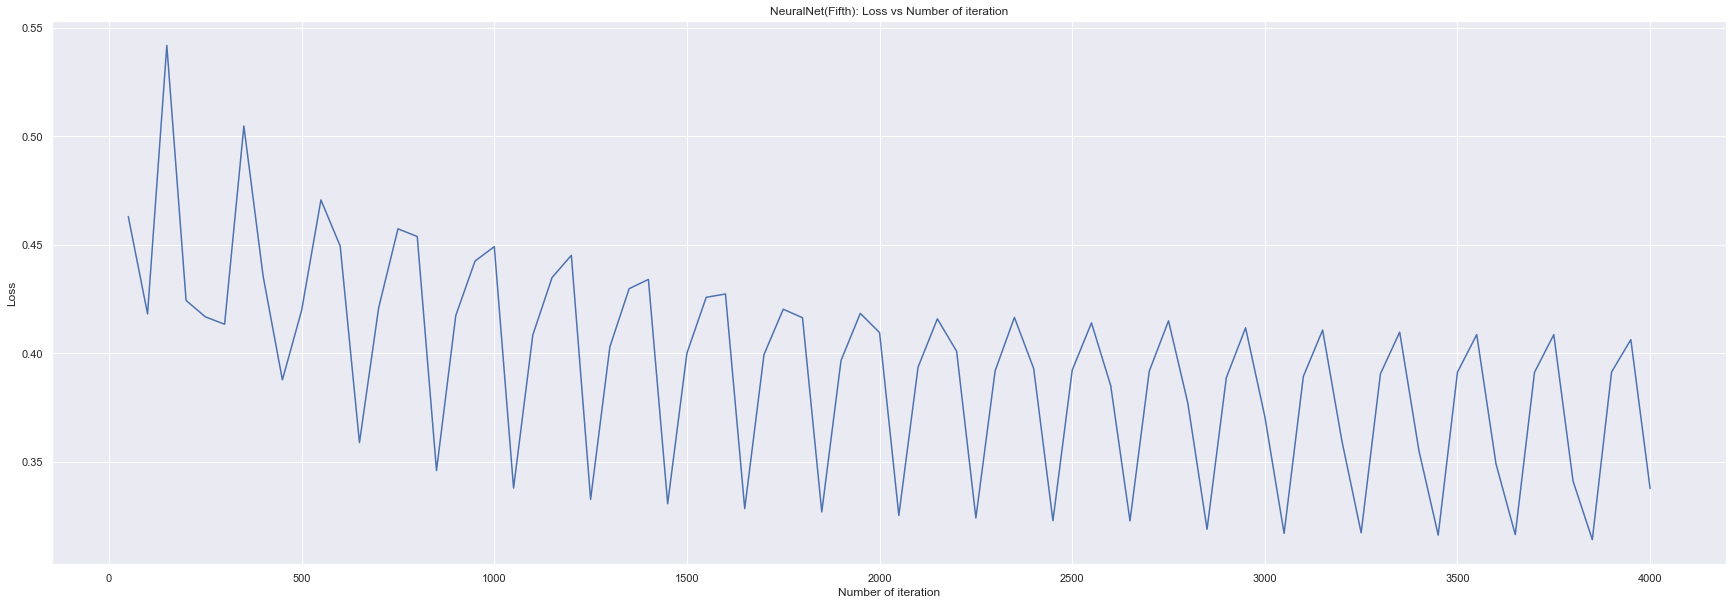

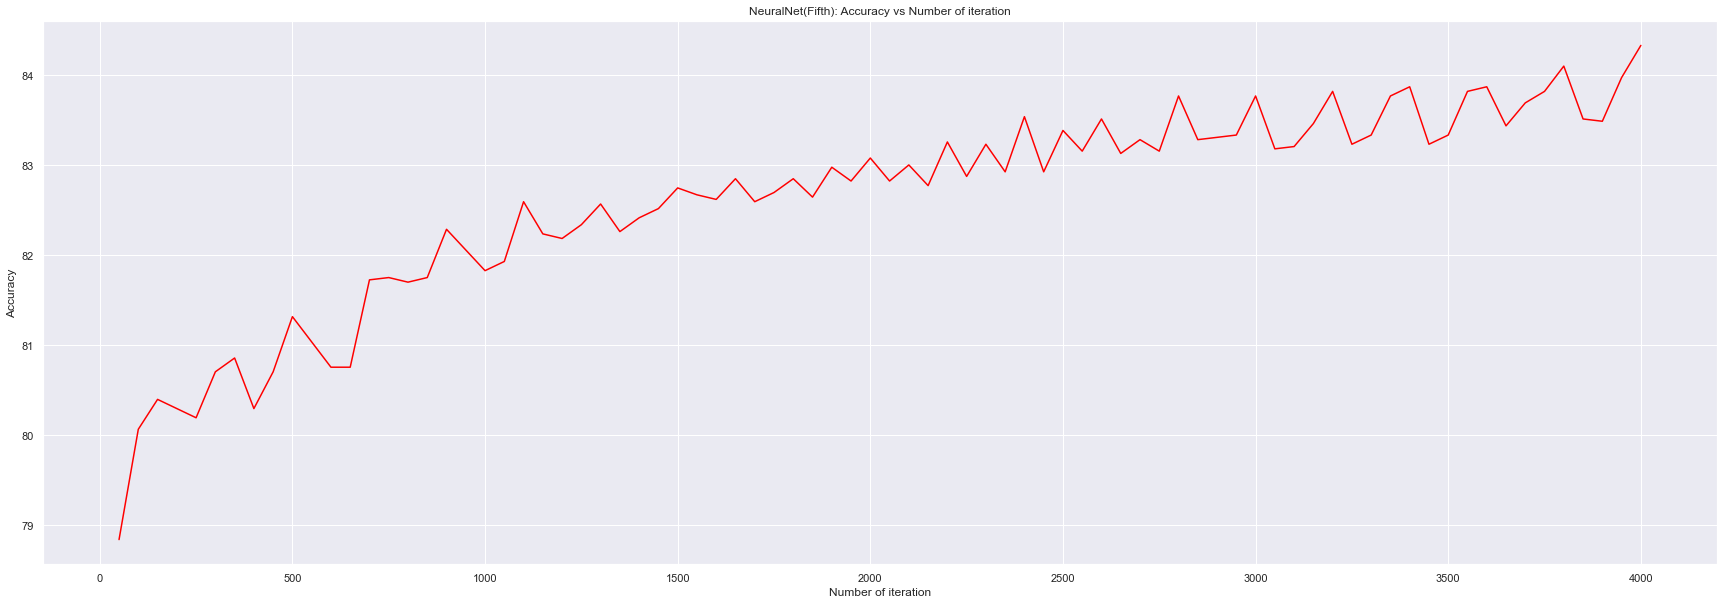

In [62]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NeuralNet(Fifth): Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("NeuralNet(Fifth): Accuracy vs Number of iteration")
plt.show()

Accuracy reaching optimal less irrational behavior potentialy due to the tanh activation fuction impacting our model

# Sixth - examining our loss function

We will change to tailor our labels - using SoftMarginLoss() which creates a criterion that optimizes a two-class classification logistic loss between input tensor 

In [751]:
class NeuralNet7(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet7,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.fc2(x2)
        x4 = self.relu2(x3)
        x5 = self.fc3(x4)
        x6 = self.elu3(x5)
        out = self.fc4(x6)
        return out
  

In [752]:
# Create Model
model7 = NeuralNet7(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# Adam Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model7.parameters(), lr=learning_rate, weight_decay=0.001)

#weight decay lets us control the generalisation of the model

In [753]:
#We will try a variety of hidden layers on our first perceptron loop
n_hidden=90
input_dim=11
output_dim=2

In [754]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = 100

In [755]:
count=0
#n_hidden= [1000,500,250,125,65,30]
loss_list=[]
iteration_list=[]
accuracy_list=[]
start_time=time.time()
for i in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model7(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model7(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
                end_time = time.time()
                print("Elapsed time was %g seconds" % (end_time - start_time))

Iteration: 500  Loss: 0.4134896993637085  Accuracy: 81.0107192993164 %
Elapsed time was 4.10783 seconds
Iteration: 1000  Loss: 0.42368030548095703  Accuracy: 81.955078125 %
Elapsed time was 7.46082 seconds
Iteration: 1500  Loss: 0.39841189980506897  Accuracy: 83.33333587646484 %
Elapsed time was 10.3179 seconds
Iteration: 2000  Loss: 0.38926807045936584  Accuracy: 83.51199340820312 %
Elapsed time was 14.9031 seconds
Iteration: 2500  Loss: 0.3870755732059479  Accuracy: 83.61408996582031 %
Elapsed time was 20.1258 seconds
Iteration: 3000  Loss: 0.3463504910469055  Accuracy: 84.40531158447266 %
Elapsed time was 25.7801 seconds
Iteration: 3500  Loss: 0.3814453184604645  Accuracy: 84.15007781982422 %
Elapsed time was 31.9759 seconds
Iteration: 4000  Loss: 0.32040315866470337  Accuracy: 84.89025115966797 %
Elapsed time was 39.091 seconds


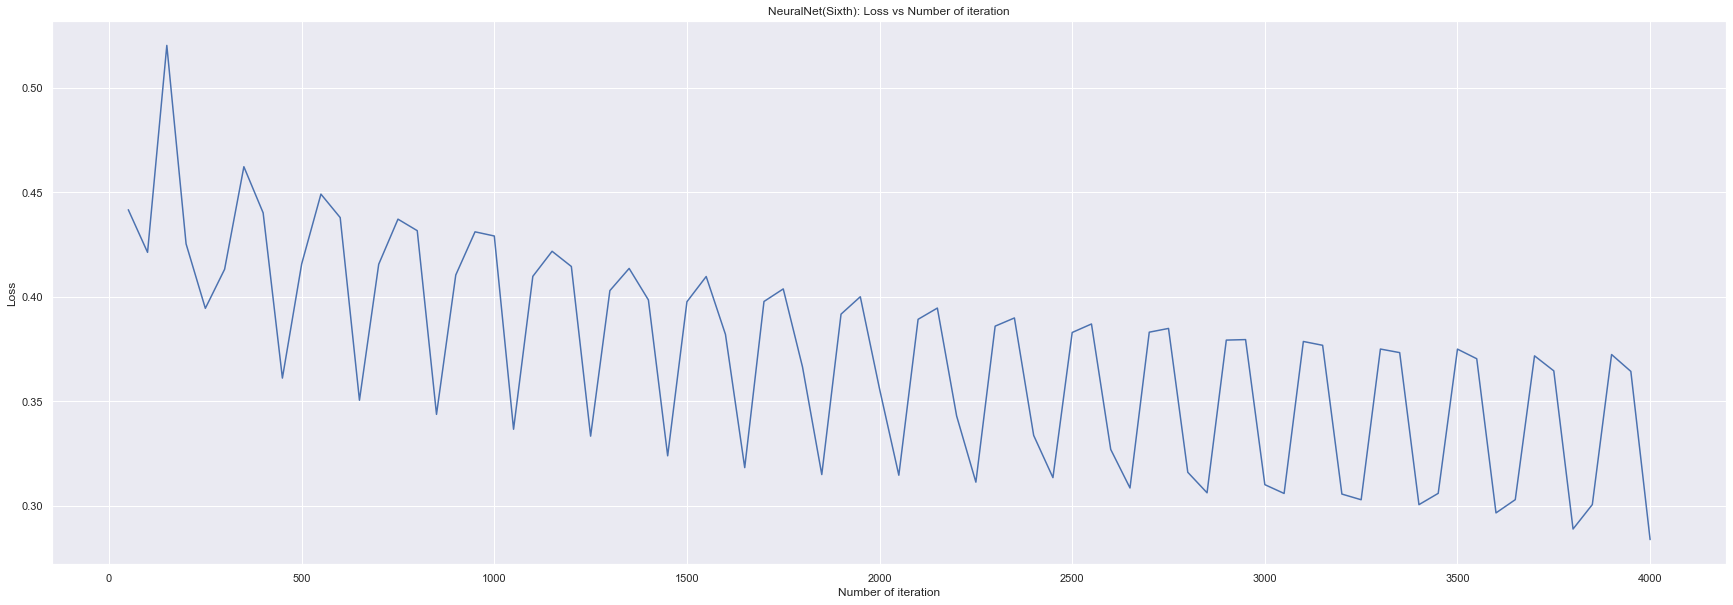

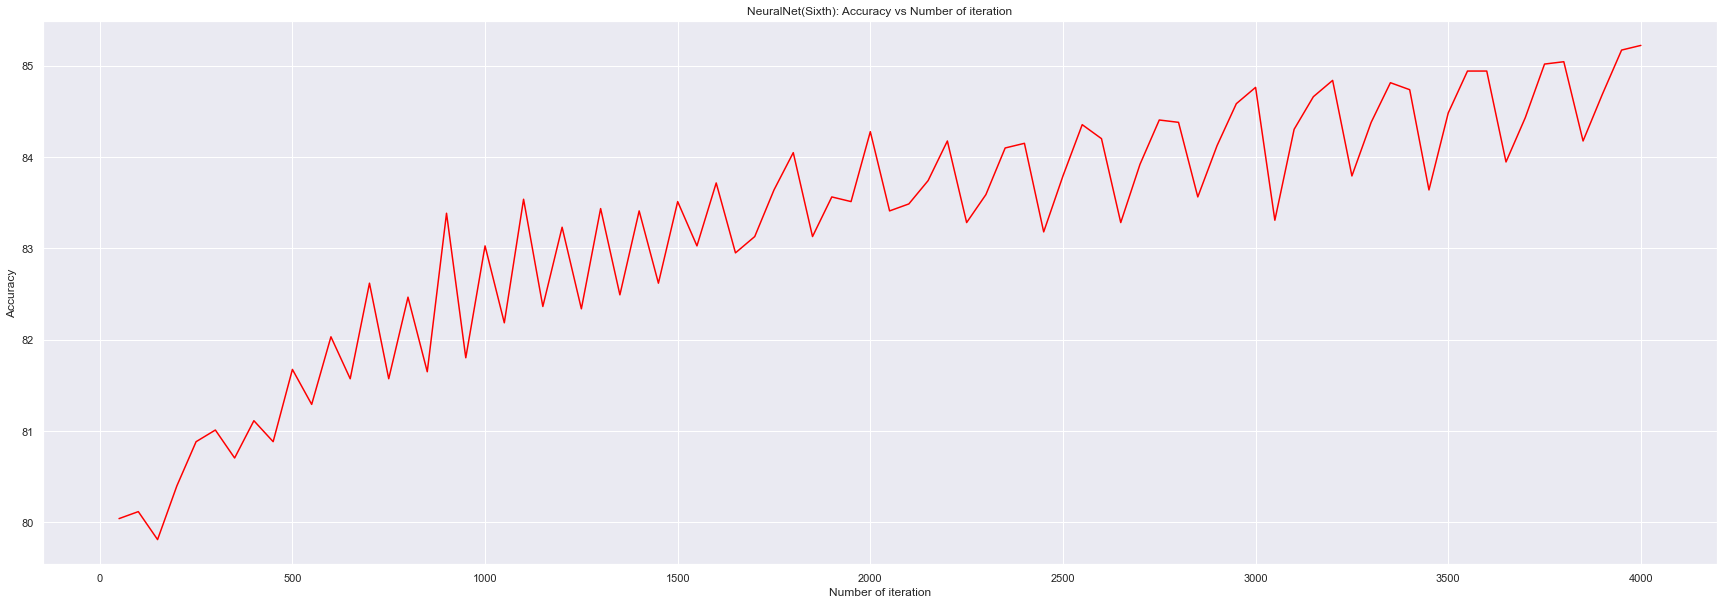

In [68]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NeuralNet(Sixth): Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("NeuralNet(Sixth): Accuracy vs Number of iteration")
plt.show()

# Seventh Training Iteration

In [971]:
class NeuralNet8(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet8,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.dropout1 = nn.Dropout(0.9)
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.relu2 = nn.ReLU()
        
        self.dropout2 = nn.Dropout(0.9)
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        
        self.elu3 =nn.ELU()
        
        self.dropout3 = nn.Dropout(0.9)
        
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        
        
        
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.dropout1(x2)
        x4 = self.fc2(x3)
        x5 = self.relu2(x4)
        x6 = self.dropout2(x5)
        x7 = self.fc3(x6)
        x8 = self.elu3(x7)
        x9 = self.dropout3(x8)
        out = self.fc4(x9)
        return out
  

In [1002]:
# Create Model
model8 = NeuralNet8(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# Adam Optimizer
learning_rate = 0.01
optimizer = torch.optim.AdamW(model8.parameters(), lr=learning_rate, weight_decay=0.001)

#weight decay lets us control the generalisation of the model

In [1003]:
#We will try a variety of hidden layers on our first perceptron loop
n_hidden=250
input_dim=11
output_dim=2

In [1007]:
# batch_size, epoch and iteration
batch_size = 20
n_iters = 10000
num_epochs = 100

In [1008]:
count=0
#n_hidden= [1000,500,250,125,65,30]
loss_list=[]
iteration_list=[]
accuracy_list=[]
start_time=time.time()
for i in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model8(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model8(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
                end_time = time.time()
                print("Elapsed time was %g seconds" % (end_time - start_time))

Iteration: 500  Loss: 0.37553584575653076  Accuracy: 79.76007843017578 %
Elapsed time was 5.80607 seconds
Iteration: 1000  Loss: 0.4560232162475586  Accuracy: 80.50025177001953 %
Elapsed time was 11.8107 seconds
Iteration: 1500  Loss: 0.4076797366142273  Accuracy: 80.24502563476562 %
Elapsed time was 18.7284 seconds
Iteration: 2000  Loss: 0.42588478326797485  Accuracy: 81.3680419921875 %
Elapsed time was 25.0335 seconds
Iteration: 2500  Loss: 0.3644583523273468  Accuracy: 80.60234832763672 %
Elapsed time was 30.4796 seconds
Iteration: 3000  Loss: 0.4014086127281189  Accuracy: 80.67891693115234 %
Elapsed time was 36.1238 seconds
Iteration: 3500  Loss: 0.4128756821155548  Accuracy: 80.21949768066406 %
Elapsed time was 41.6733 seconds
Iteration: 4000  Loss: 0.40417414903640747  Accuracy: 80.78101348876953 %
Elapsed time was 47.1091 seconds


Incredible using the Adam Optimisation increased our accuracy however including weight decay regulisation increased our model accuracy up to 86% This will be our model to test!- Trained until capped

In [980]:
print('Final Train Loss:', loss_list[50])
print('Final Train accuracy:', (accuracy_list[50]))

Final Train Loss: tensor(0.4043)
Final Train accuracy: tensor(83.8693)


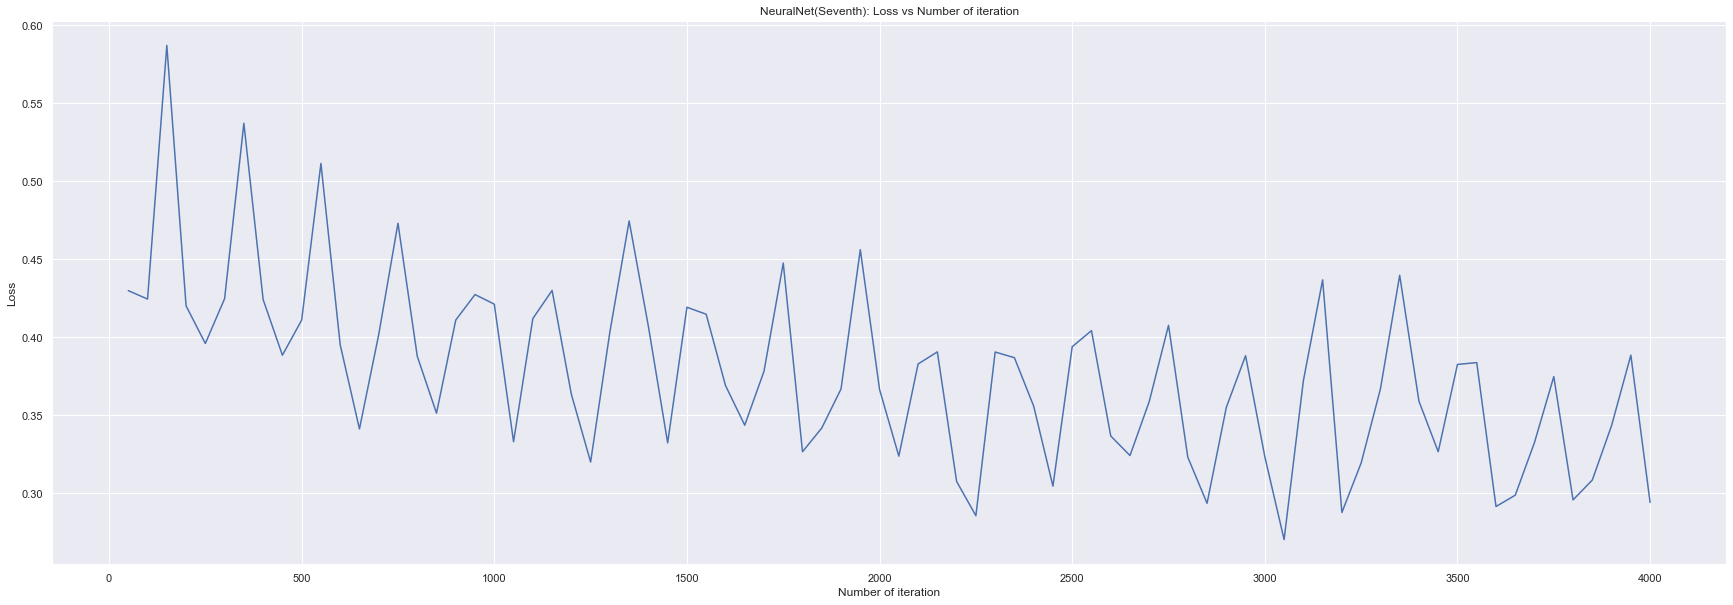

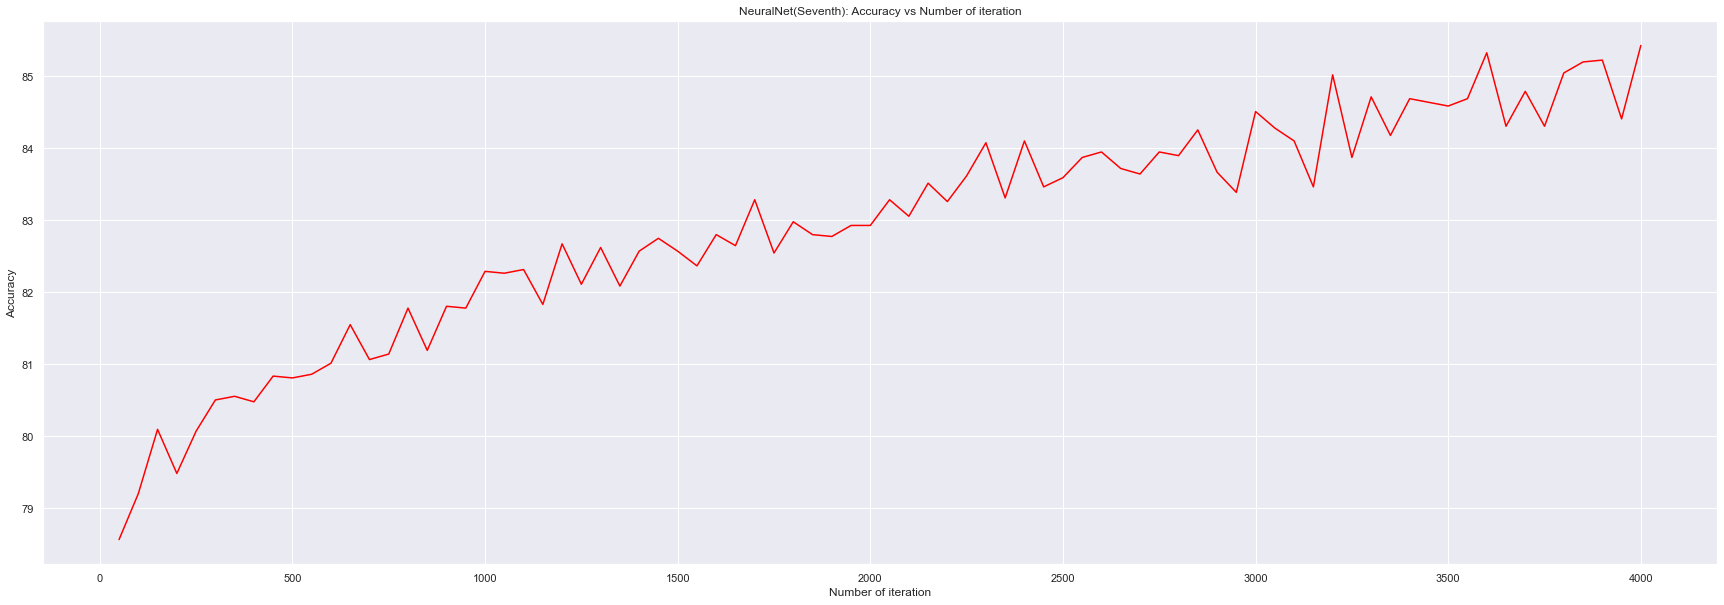

In [981]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NeuralNet(Seventh): Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("NeuralNet(Seventh): Accuracy vs Number of iteration")
plt.show()

**This is certainly the best model built however after testing below I realied the test model didn't perform well with our minority class(1) hence I will split the data again and train the model above check if we can maintain the same level of performance and examine how this will affect our testing**

**RESETTING Our data with our original data taking away our oversampling**

In [1011]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

In [ ]:
# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

In [ ]:
x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')

In [ ]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')


#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# Save, load and test our best trained Neural network!

In [679]:
model8.eval()

NeuralNet8(
  (fc1): Linear(in_features=11, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (elu3): ELU(alpha=1.0)
  (fc4): Linear(in_features=100, out_features=2, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
)

In [678]:
print(model8.state_dict())

OrderedDict([('fc1.weight', tensor([[-0.1486,  0.1693, -0.0482,  ...,  0.1529,  0.0715, -0.2358],
        [-0.5418, -0.0718, -0.5517,  ...,  0.2828,  0.0254,  0.0504],
        [ 0.2951, -0.1438, -0.2472,  ..., -0.0128, -0.1954,  0.0097],
        ...,
        [-0.0061,  0.2473,  0.3152,  ..., -0.2338,  0.0660,  0.0382],
        [-0.1858, -0.3335,  0.0337,  ..., -0.1317,  0.2772, -0.3902],
        [ 0.2017,  0.1849, -0.4044,  ...,  0.3347,  0.0591, -0.3453]])), ('fc1.bias', tensor([ 0.1545, -0.0265, -0.2648, -0.0295, -0.1825,  0.2078, -0.0229,  0.1347,
        -0.1606, -0.2129,  0.1476,  0.1189,  0.2523,  0.2186, -0.1673, -0.1874,
        -0.1444,  0.1066,  0.0088,  0.0847,  0.0467, -0.2886, -0.2083, -0.2367,
        -0.0522, -0.2309,  0.0029, -0.2315,  0.0847,  0.0584, -0.3018,  0.0487,
        -0.0438, -0.2385,  0.1432,  0.0391, -0.0281,  0.1459,  0.0625,  0.1264,
        -0.2127,  0.0903,  0.0983, -0.2260, -0.0252,  0.2005,  0.2631, -0.0746,
        -0.1653, -0.2845, -0.1420,  0.2970,

In [982]:
for param in model8.parameters():
    print(param)

Parameter containing:
tensor([[-0.2257, -0.0252, -0.3058,  ..., -0.0301, -0.1527,  0.1004],
        [-0.2220,  0.0782, -0.1957,  ...,  0.0462, -0.0304,  0.0343],
        [-0.0114, -0.1153,  0.0203,  ...,  0.1684, -0.0701,  0.0087],
        ...,
        [-0.0616, -0.0255,  0.0201,  ..., -0.1899,  0.1401,  0.0285],
        [ 0.0195, -0.0260,  0.0165,  ..., -0.1328, -0.0959, -0.2820],
        [-0.2426, -0.1154,  0.1170,  ...,  0.1646, -0.1341, -0.1961]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0569, -0.0556, -0.0378,  0.0881,  0.0230,  0.1273, -0.0590,  0.0318,
        -0.1738, -0.1108, -0.0697, -0.0240,  0.1262, -0.1607, -0.0842,  0.1742,
         0.1567, -0.0871, -0.1698, -0.1199, -0.0742, -0.0234,  0.0722,  0.1567,
        -0.1717, -0.0902,  0.1323,  0.0796, -0.0839,  0.0103,  0.0693,  0.0137,
        -0.1595,  0.0101,  0.0981,  0.1259,  0.0091, -0.1472,  0.0579, -0.0376,
         0.0673,  0.0398, -0.0777,  0.1421,  0.0713, -0.1629,  0.1337, -0.0371,
         0.0617

# ***Save our best performing model***

In [983]:
# save
modFile = "Model8.pth"
torch.save(model8, modFile)

# ***Load best performing model***

In [984]:
# load
loaded_model = torch.load(modFile)

In [985]:
loaded_model.eval()

NeuralNet8(
  (fc1): Linear(in_features=11, out_features=250, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=250, out_features=250, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.6, inplace=False)
  (fc3): Linear(in_features=250, out_features=250, bias=True)
  (elu3): ELU(alpha=1.0)
  (dropout3): Dropout(p=0.4, inplace=False)
  (fc4): Linear(in_features=250, out_features=2, bias=True)
)

In [886]:
#Make sure parameters are the same
for param in loaded_model.parameters():
    print(param)

Parameter containing:
tensor([[-0.1608, -0.1576,  0.0449,  ..., -0.1960,  0.2461, -0.1593],
        [-0.2843,  0.0660,  0.2697,  ..., -0.0741,  0.0200, -0.2336],
        [ 0.2188,  0.4010, -0.2241,  ...,  0.0764,  0.0862, -0.1429],
        ...,
        [-0.1370, -0.1873, -0.2680,  ..., -0.0996, -0.3201,  0.2163],
        [ 0.2095,  0.0976, -0.3509,  ..., -0.1533,  0.2653, -0.2156],
        [ 0.2431,  0.3134, -0.2889,  ...,  0.0827, -0.1495,  0.1622]],
       requires_grad=True)
Parameter containing:
tensor([-1.3817e-01,  7.5699e-02, -2.3841e-01,  5.4199e-02,  1.9991e-02,
        -1.0869e-02, -2.6691e-01,  8.1150e-02, -1.4508e-01, -2.7185e-01,
        -1.5142e-01, -1.3395e-01,  1.8689e-01,  5.5724e-02,  5.8794e-02,
         7.1199e-02,  1.8500e-02,  1.8713e-01,  9.5442e-02,  3.1031e-02,
         3.9409e-02, -1.2188e-01,  1.5367e-01, -2.2881e-01,  2.4685e-01,
        -1.8365e-01, -2.3566e-01,  1.0783e-01, -2.0139e-02,  7.4703e-02,
        -3.1495e-02, -2.3778e-01,  1.0308e-02, -1.5911e-0

# Prepare data for training

In [ ]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')


#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# Testing our Loaded Model

In [165]:
error = nn.CrossEntropyLoss()
# Adam Optimizer
learning_rate = 0.001
optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=learning_rate) #weight_decay=0.001)

#weight decay lets us control the generalisation of the model

#We will try a variety of hidden layers on our first perceptron loop
n_hidden=100
input_dim=11
output_dim=2

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = 100

In [158]:
y_pred_list = []
with torch.no_grad():
    loaded_model.eval()
    for features, _ in test_loader:
        features = features.to(device)
        y_test_pred = loaded_model(features)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.tolist() for a in y_pred_list]

In [997]:
y_pred=loaded_model(Variable(featuresTest))

In [998]:
y_pred

tensor([[  2.1191,  -2.0738],
        [  2.5823,  -2.5163],
        [  0.5028,  -0.4730],
        ...,
        [ 21.2580, -20.7731],
        [ 18.3407, -17.9356],
        [  7.7709,  -7.6322]], grad_fn=<AddmmBackward>)

In [999]:
y_pred=y_pred.detach().numpy()

In [1000]:
from keras.utils.np_utils import to_categorical
labels123 = to_categorical(np.argmax(y_pred,1), dtype = "int64")

In [955]:
#from keras.utils.np_utils import to_categorical
#y_pred1 = to_categorical(np.argmax(y_pred, 0), dtype = "int64")
#y_pred = to_categorical(y_pred,dtype="int64")
#y_pred1

#from keras.utils.np_utils import to_categorical
#labels123 = to_categorical(np.argmax(y_pred_arr, 1), dtype = "int64")


In [1001]:
#Confusion Matrix
confusion_matrix(y_test,labels123.argmax(axis=1))

array([[737,  29],
       [163,  51]])

In [957]:
print(classification_report(y_test,labels123.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       766
           1       0.56      0.28      0.37       214

    accuracy                           0.79       980
   macro avg       0.69      0.61      0.63       980
weighted avg       0.77      0.79      0.77       980



In [863]:
print('ROC AUC Score: ',(roc_auc_score(y_test,labels123.argmax(axis=1))*100))

ROC AUC Score:  63.93328615699958


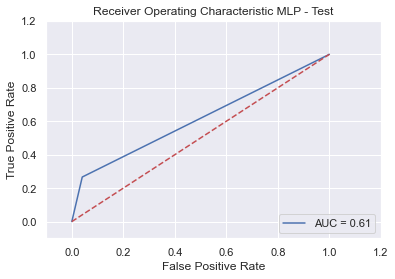

In [828]:
#Lets plot our ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(yT.argmax(axis=1),labels123.argmax(axis=1))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic MLP - Test')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion Matrix MLP
 [[735  31]
 [157  57]]

Normalized confusion matrix MLP
[[0.95953003 0.04046997]
 [0.73364486 0.26635514]]


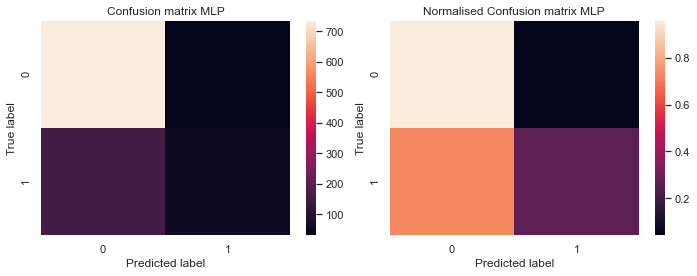

In [829]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test,labels123.argmax(axis=1))
print('Confusion Matrix MLP\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix MLP')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix MLP')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix MLP')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()


** Concluding notes **

**This is certainly the best model built however after testing below I realied the test model didn't perform well with our minority class(1) hence I will split the data again and train the model above check if we can maintain the same level of performance and examine how this will affect our testing**

**RESETTING Our data with our original data taking away our oversampling**

In [1014]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

In [1015]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

In [1016]:
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [1017]:
x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')

In [1018]:
# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

**Lets build a model with a untouched data**

In [1161]:
class NeuralNet9(nn.Module):
    def __init__(self,input_dim,n_hidden,output_dim):
        super(NeuralNet9,self).__init__()
        self.fc1=nn.Linear(input_dim,n_hidden)
        self.relu1 = nn.ReLU()
        
        self.dropout1 = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.relu2 = nn.ReLU()
        
        self.dropout2 = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(n_hidden, n_hidden)
        
        self.elu3 =nn.ELU()
        
        self.dropout3 = nn.Dropout(0.5)
        
        self.fc4 = nn.Linear(n_hidden, output_dim) 
        
        
        
    def forward(self, x):
 
        x1 = self.fc1(x)
        x2 = self.relu1(x1)
        x3 = self.dropout1(x2)
        x4 = self.fc2(x3)
        x5 = self.relu2(x4)
        x6 = self.dropout2(x5)
        x7 = self.fc3(x6)
        x8 = self.elu3(x7)
        x9 = self.dropout3(x8)
        out = self.fc4(x9)
        return out
  

In [1285]:
# Create Model
model9 = NeuralNet9(input_dim, n_hidden, output_dim)
# add CrossEntropyLoss Function 
error = nn.CrossEntropyLoss()
# Adam Optimizer
learning_rate = 0.001
optimizer = torch.optim.AdamW(model9.parameters(), lr=learning_rate, weight_decay=0.1)

#weight decay lets us control the generalisation of the model

In [1286]:
#We will try a variety of hidden layers on our first perceptron loop
n_hidden=250
input_dim=11
output_dim=2

In [1287]:
# batch_size, epoch and iteration
batch_size = 500
n_iters = 10000
num_epochs = 100

In [1288]:
count=0
#n_hidden= [1000,500,250,125,65,30]
loss_list=[]
iteration_list=[]
accuracy_list=[]
start_time=time.time()
for i in range(num_epochs):
    for i, (features,labels) in enumerate (train_loader):
        #Variable provides a backward method to perform backpropagation.
        train = Variable(features)
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model9(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Lets see how the data predicts using training set
            for features, labels in train_loader:

                test = Variable(features)
                
                # Forward propagation
                outputs = model9(test)  #[output]=100,2
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1] #[100]
                
                # Total number of labels
                total += len(labels) #100

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
                end_time = time.time()
                print("Elapsed time was %g seconds" % (end_time - start_time))

Iteration: 500  Loss: 0.407273530960083  Accuracy: 80.09188079833984 %
Elapsed time was 5.3524 seconds
Iteration: 1000  Loss: 0.2683391273021698  Accuracy: 79.30066680908203 %
Elapsed time was 10.403 seconds
Iteration: 1500  Loss: 0.29173749685287476  Accuracy: 81.54670715332031 %
Elapsed time was 15.6422 seconds
Iteration: 2000  Loss: 0.4153783917427063  Accuracy: 81.29147338867188 %
Elapsed time was 20.7716 seconds
Iteration: 2500  Loss: 0.3907270133495331  Accuracy: 82.23583221435547 %
Elapsed time was 26.14 seconds
Iteration: 3000  Loss: 0.2580376863479614  Accuracy: 82.79734802246094 %
Elapsed time was 31.2329 seconds
Iteration: 3500  Loss: 0.3285882771015167  Accuracy: 82.23583221435547 %
Elapsed time was 36.4928 seconds
Iteration: 4000  Loss: 0.34311166405677795  Accuracy: 82.79734802246094 %
Elapsed time was 41.7132 seconds
Iteration: 4500  Loss: 0.6238745450973511  Accuracy: 82.87391662597656 %
Elapsed time was 46.9768 seconds
Iteration: 5000  Loss: 0.2776150405406952  Accurac

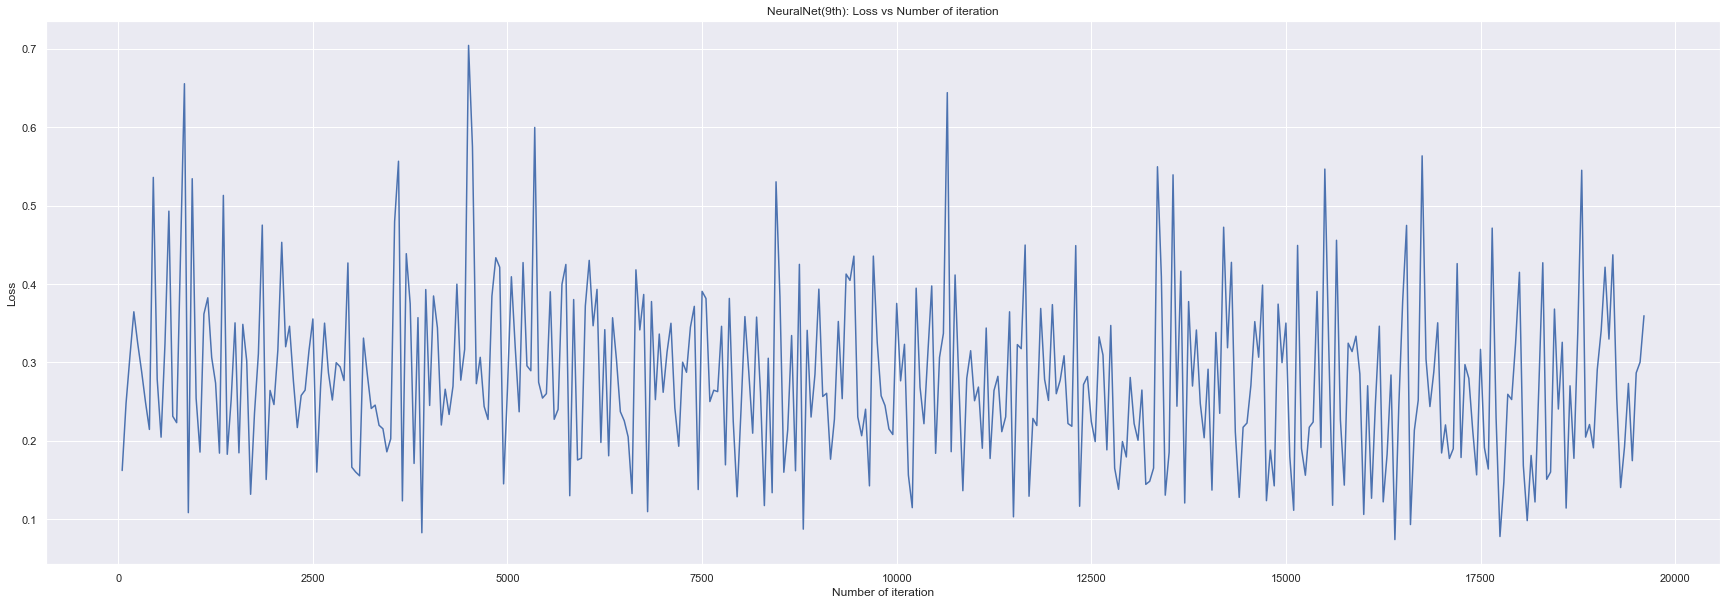

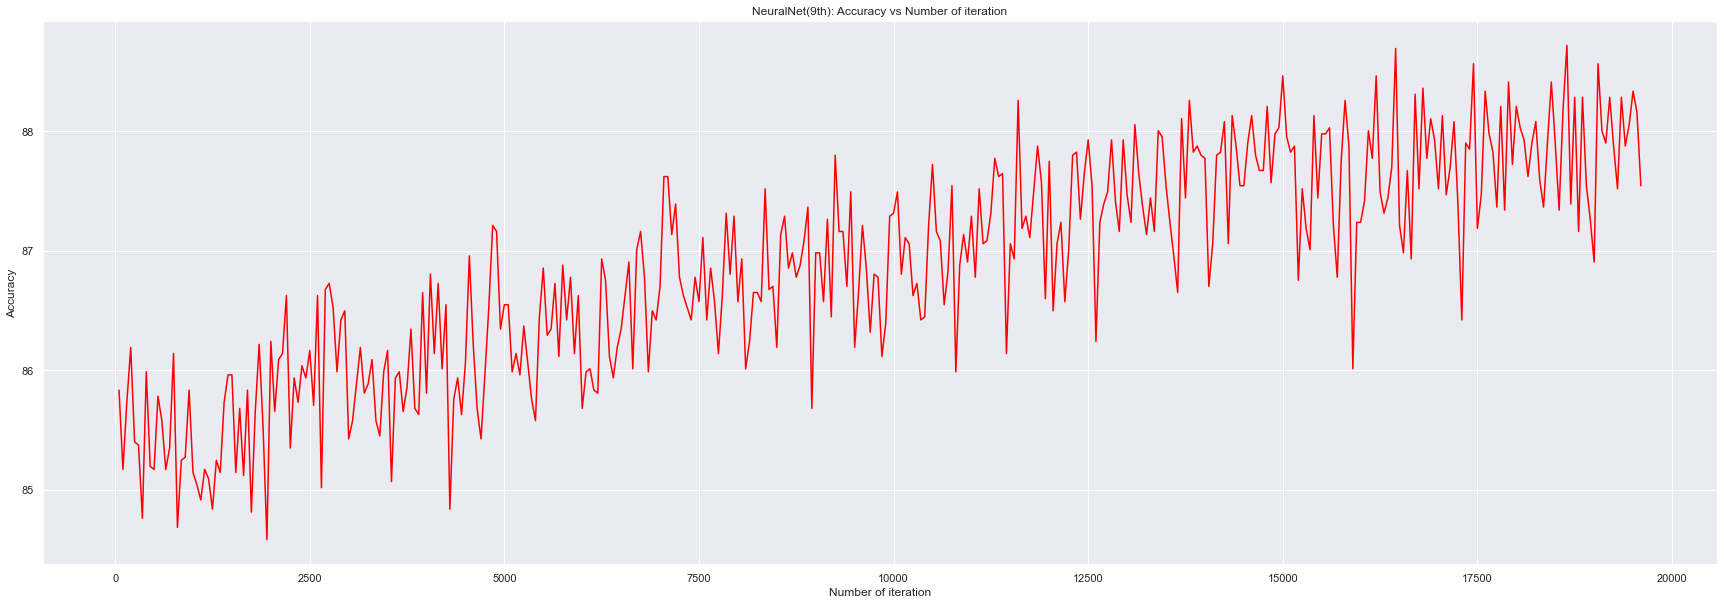

In [1046]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("NeuralNet(9th): Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("NeuralNet(9th): Accuracy vs Number of iteration")
plt.show()

# Save our model

In [1289]:
# save
mod9File = "Model9.pth"
torch.save(model9, mod9File)

# Load our model

In [1290]:
# load
loaded_model9 = torch.load(mod9File)

# Load dataset for testing

In [ ]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')


#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# Test our model

In [1322]:
y_pred1=loaded_model9(Variable(featuresTest))

In [1323]:
y_pred1=y_pred1.detach().numpy()

In [1324]:
from keras.utils.np_utils import to_categorical
labels999 = to_categorical(np.argmax(y_pred1,1), dtype = "int64")

In [1325]:
#Confusion Matrix
confusion_matrix(y_test,labels999.argmax(axis=1))

array([[713,  53],
       [146,  68]])

In [1326]:
print(classification_report(y_test,labels999.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       766
           1       0.56      0.32      0.41       214

    accuracy                           0.80       980
   macro avg       0.70      0.62      0.64       980
weighted avg       0.77      0.80      0.77       980



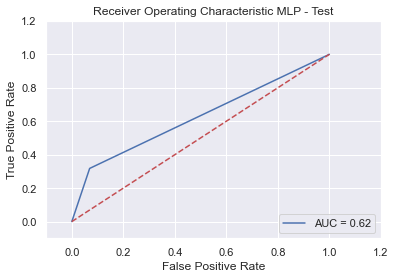

In [1327]:
#Lets plot our ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,labels999.argmax(axis=1))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic MLP - Test')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix MLP
 [[713  53]
 [146  68]]

Normalized confusion matrix MLP
[[0.9308094  0.0691906 ]
 [0.68224299 0.31775701]]


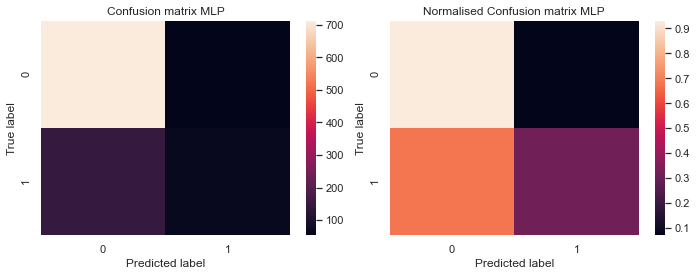

In [1328]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test,labels999.argmax(axis=1))
print('Confusion Matrix MLP\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix MLP')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix MLP')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix MLP')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [ ]:
df1=np.array(df)
features = df1[:,:-1]
labels = df1[:,-1]

# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')


#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# create feature and targets tensor for train set. We need variable to accumulate gradients.
featuresTrain = torch.from_numpy(x_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(x_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# SVM Model

We now will use Support Vector machines to examine performance on our classification problem. 
SVM as our Wine Dataset is one dimensional we will utilise the Kernel trick to examine different technique to increase the dimension of our dataset. We will therefore examine affects of our weighting amongst our features and oue different ranges of costing amonst our model

In [20]:
from sklearn.svm import *
from sklearn.pipeline import *
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

**Prepare our data without SMOTE -> imbalanced target variable** 

In [14]:
df1.shape

(4898, 12)

In [15]:
features = df1[:,:-1]
labels = df1[:,-1]

In [16]:
labels

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [17]:
# train test split. Size of train data is 80% and size of test data is 20%. 
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.2,random_state = 39) 

In [18]:
#NORMALISE FEATURES
#normalise features to 0,1
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [16]:
x_train = x_train.astype('float32')
y_train=y_train.astype('int64')
x_test=x_test.astype('float32')
y_test=y_test.astype('int64')

Initiate SVM parameters

C parameter: The core idea is simple: we modify the optimization problem to optimize both the fit of the line to data and penalizing the amount of samples inside the margin at the same time, where C defines the weight of how much samples inside the margin contribute to the overall error. Consequently, with C you can adjust how hard or soft your large margin classification should be. With a low C, samples inside the margins are penalized less than with a higher C. With a C of 0, samples inside the margins are not penalized anymore - which is the one possible extreme of disabling the large margin classification. With an infinite C you have the other possible extreme of hard margins.

Gamma: Defines how far the influence of a single training example reaches. Therefore Low values = Far, high values = close.

In [97]:
import time 

In [ ]:
start_time = time.time() main() print("--- %s seconds ---" % (time.time() - start_time))

In [98]:
start=time.time()
ranging_C = [0.0001 ,0.1 ,1 ,10]
ranging_kernels = ['linear', 'rbf' , 'poly']
ranging_gamma = [0.0001 ,0.1 ,1 ,10]
#binding our parameters for the model
parameters_GridSearch = dict(gamma = ranging_gamma, C=ranging_C , kernel = ranging_kernels )
CrossVal = StratifiedShuffleSplit(n_splits=5,test_size=0.2, random_state = 59)
grid=GridSearchCV(SVC(),param_grid=parameters_GridSearch,cv=CrossVal)
print('It took', time.time()-start, 'seconds.')

It took 0.0005948543548583984 seconds.


In [99]:
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=59, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.0001, 0.1, 1, 10],
                         'gamma': [0.0001, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [100]:
start=time.time()#We now fit our grid setup function to our training set 
grid.fit(x_train,y_train)
print('It took', time.time()-start, 'seconds.')

It took 290.1280026435852 seconds.


In [101]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 10, 'kernel': 'rbf'} with a score of 0.83


In [102]:
start=time.time()
C_range = [0.001,0.01,0.1,1,10]
gamma_range = [0.001,0.01,0.1,1,10]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
print('It took', time.time()-start, 'seconds.')

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.82
It took 65.16791224479675 seconds.


As per further research; I've come across PCA being used to analyse decision surfaces https://iopscience.iop.org/article/10.1088/1742-6596/971/1/012003

I'm going to apply the PCA analysis then producing a 2 dimensional array to visually analyse the affects of varying parameters

In [16]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, cdist

In [ ]:
train_arr = np.vstack((arr, arr2))

In [17]:
pca = PCA(n_components=2).fit(x_train)
pca_x = pca.transform(x_train)

pca1 = PCA(n_components=2).fit(x_test)
pca2 = pca.transform(x_test)

In [18]:
# Let's check out the result of our PCA applied to the dataFrame df
print("The pca_x variable has a shape of :", pca_x.shape)
print(pca_x)

The pca_x variable has a shape of : (3918, 2)
[[-0.25463238 -0.0035644 ]
 [-0.29325247 -0.07381103]
 [ 0.07038185  0.00272554]
 ...
 [-0.30561924 -0.13345313]
 [-0.21473807 -0.08603093]
 [ 0.39861616 -0.02219187]]


In [19]:
df_feat=df.drop('quality', 1)

In [41]:
df_feat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [52]:
# Ordering the features by their coefficients in the equation of the first Principal Component
# PC1 = a*column1 + b*column2 + ... + zzz*column101. The coefficients of PC1 a, b, c, ..zzz also called loadings, are stored in pca_clean.components_[0]
pca_x_1 = pca.components_[0] # First principal component
sort_array_1 = np.argsort(np.abs(pca_x_1)) # Sorting the 'Indexes' of the pca_clean_1 array from the lowest value to the highest (in magnitude, ignoring the sign)
pca_x_1_highest_values = pca_x_1[sort_array_1][::-1][:10] # We sorted from low to high, [::-1] retrieves all values backward (to inverse the sort), [:10] get the first
pca_x_1_cols_highest_values = df_feat.columns[sort_array_1][::-1][:10] # retrieving the names of the columns corresponding to the highest values
# The '1+sort_array' accounts for the fact that df has the 'communityname' column and sort_array sorted indices in an array that didn't have the column (we dropped it before doing PCA)

# Same thing but ... a little bit more compact
pca_x_2_highest_values = np.asarray(pca.components_[1])[np.argsort(np.abs(pca.components_[1]))][::-1][:10]
pca_x_2_cols_highest_values = df_feat.columns[np.argsort(np.abs(pca.components_[1]))][::-1][:10]

# Printing the result
print('\nFirst Principal Component : 10 Highest Loadings (in magnitude)\n')
for i in range(10):
    print('The Column "{}" has a loading of : {}'.format(pca_x_1_cols_highest_values[i], pca_x_1_highest_values[i]))

print('\nSecond Principal Component : 10 Highest Loadings (in magnitude)\n')
for i in range(10):
    print('The Column "{}" has a loading of : {}'.format(pca_x_2_cols_highest_values[i], pca_x_2_highest_values[i]))


First Principal Component : 10 Highest Loadings (in magnitude)

The Column "alcohol" has a loading of : 0.8909500241279602
The Column "total sulfur dioxide" has a loading of : -0.25415149331092834
The Column "density" has a loading of : -0.2237817347049713
The Column "residual sugar" has a loading of : -0.2022794634103775
The Column "pH" has a loading of : 0.14536744356155396
The Column "chlorides" has a loading of : -0.11344246566295624
The Column "free sulfur dioxide" has a loading of : -0.09378495812416077
The Column "fixed acidity" has a loading of : -0.07014767080545425
The Column "citric acid" has a loading of : -0.045376334339380264
The Column "volatile acidity" has a loading of : 0.024009378626942635

Second Principal Component : 10 Highest Loadings (in magnitude)

The Column "pH" has a loading of : 0.7438380122184753
The Column "sulphates" has a loading of : 0.5979219675064087
The Column "fixed acidity" has a loading of : -0.22800974547863007
The Column "total sulfur dioxide"

pH levels and alcohol apply most variance on the prediction on our labels.

Lets apply the same code to our training data and use this to visualise the affect on our SVM

In [56]:
# Ordering the features by their coefficients in the equation of the first Principal Component
# PC1 = a*column1 + b*column2 + ... + zzz*column101. The coefficients of PC1 a, b, c, ..zzz also called loadings, are stored in pca_clean.components_[0]
pca_x_1 = pca1.components_[0] # First principal component
sort_array_1 = np.argsort(np.abs(pca_x_1)) # Sorting the 'Indexes' of the pca_clean_1 array from the lowest value to the highest (in magnitude, ignoring the sign)
pca_x_1_highest_values = pca_x_1[sort_array_1][::-1][:10] # We sorted from low to high, [::-1] retrieves all values backward (to inverse the sort), [:10] get the first
pca_x_1_cols_highest_values = df_feat.columns[sort_array_1][::-1][:10] # retrieving the names of the columns corresponding to the highest values
# The '1+sort_array' accounts for the fact that df has the 'communityname' column and sort_array sorted indices in an array that didn't have the column (we dropped it before doing PCA)

# Same thing but ... a little bit more compact
pca_x_2_highest_values = np.asarray(pca1.components_[1])[np.argsort(np.abs(pca1.components_[1]))][::-1][:10]
pca_x_2_cols_highest_values = df_feat.columns[np.argsort(np.abs(pca1.components_[1]))][::-1][:10]

# Printing the result
print('\nFirst Principal Component : 10 Highest Loadings (in magnitude)\n')
for i in range(10):
    print('The Column "{}" has a loading of : {}'.format(pca_x_1_cols_highest_values[i], pca_x_1_highest_values[i]))

print('\nSecond Principal Component : 10 Highest Loadings (in magnitude)\n')
for i in range(10):
    print('The Column "{}" has a loading of : {}'.format(pca_x_2_cols_highest_values[i], pca_x_2_highest_values[i]))


First Principal Component : 10 Highest Loadings (in magnitude)

The Column "alcohol" has a loading of : -0.6938718557357788
The Column "density" has a loading of : 0.41888028383255005
The Column "residual sugar" has a loading of : 0.4088412821292877
The Column "total sulfur dioxide" has a loading of : 0.2813951373100281
The Column "free sulfur dioxide" has a loading of : 0.22679489850997925
The Column "fixed acidity" has a loading of : 0.141052708029747
The Column "pH" has a loading of : -0.09804461151361465
The Column "chlorides" has a loading of : 0.0967174619436264
The Column "citric acid" has a loading of : 0.07382016628980637
The Column "sulphates" has a loading of : 0.031165869906544685

Second Principal Component : 10 Highest Loadings (in magnitude)

The Column "pH" has a loading of : -0.6575982570648193
The Column "fixed acidity" has a loading of : 0.5972237586975098
The Column "free sulfur dioxide" has a loading of : -0.29214122891426086
The Column "citric acid" has a loading

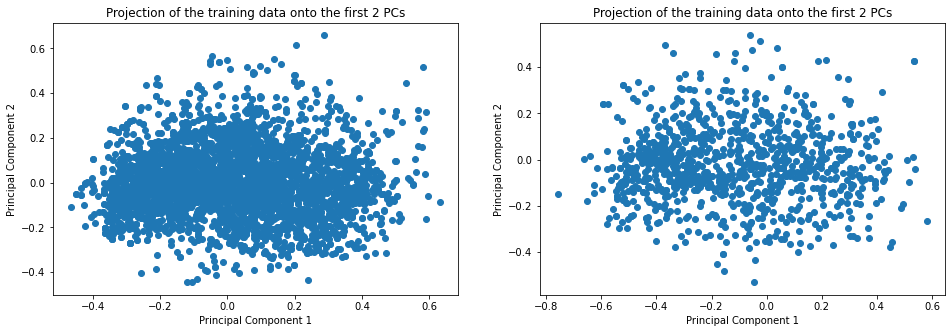

In [57]:
# Let's visualize the results
plt.figure(num=1, figsize=(16,5))

# First, the normal data
plt.subplot(1,2,1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of the training data onto the first 2 PCs")
plt.scatter(pca_x[:,0], pca_x[:,1],cmap='viridis'); # pca_x[:, 0] is the first column corresponding to the first principal component, same reasoning for pca[:, 1]

# First, the normal data
plt.subplot(1,2,2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of the training data onto the first 2 PCs")
plt.scatter(pca2[:,0], pca2[:,1],cmap='viridis'); # pca_x[:, 0] is the first column corresponding to the first principal component, same reasoning for pca[:, 1]




Interesting this makes me doubt my reasoning behind even carrying out the oversampling smote test perhaps the dispersement in our features for our test set slightly miss aligned which we will explore in our report

Lets continue with our SVM...

In [33]:
pca_x.shape

(3918, 2)

In [34]:
y_train.shape

(3918,)

^^ we will use these as to train our svm and see if we get the same score as above (83%) or better

In [ ]:
start=time.time()#We now fit our grid setup function to our training set 
grid.fit(x_train,y_train)
print('It took', time.time()-start, 'seconds.')

In [47]:
start=time.time()
C_range = [0.001,0.01,0.1,1,10]
gamma_range =[0.001,0.01,0.1,1,10]
ranging_kernels = ['linear', 'rbf' , 'poly']
param_grid = dict(gamma=gamma_range, C=C_range, kernel = ranging_kernels)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid1 = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid1.fit(pca_x, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid1.best_params_, grid1.best_score_))
print('It took', time.time()-start, 'seconds.')

The best parameters are {'C': 10, 'gamma': 10, 'kernel': 'rbf'} with a score of 0.80
It took 144.12893795967102 seconds.


Therefore, USing Only RBF Kernel

In [50]:
grid1rbf.cv_results_['mean_test_score'].shape

(25,)

In [49]:
start=time.time()
C_range = [0.001,0.01,0.1,1,10]
gamma_range = [0.001,0.01,0.1,1,10]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid1rbf = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid1rbf.fit(pca_x, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid1rbf.best_params_, grid1rbf.best_score_))
print('It took', time.time()-start, 'seconds.')

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.80
It took 83.17053198814392 seconds.


In [22]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

In [23]:
start=time.time()
C_2d_range = [0.0001 ,0.001, 0.01, 0.1 ,1 ,10, 100]
gamma_2d_range = [0.0001 ,0.001, 0.01, 0.1 ,1 ,10, 100]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(pca_x, y_train)
        classifiers.append((C, gamma, clf))
print('It took', time.time()-start, 'seconds.')

It took 46.09053421020508 seconds.


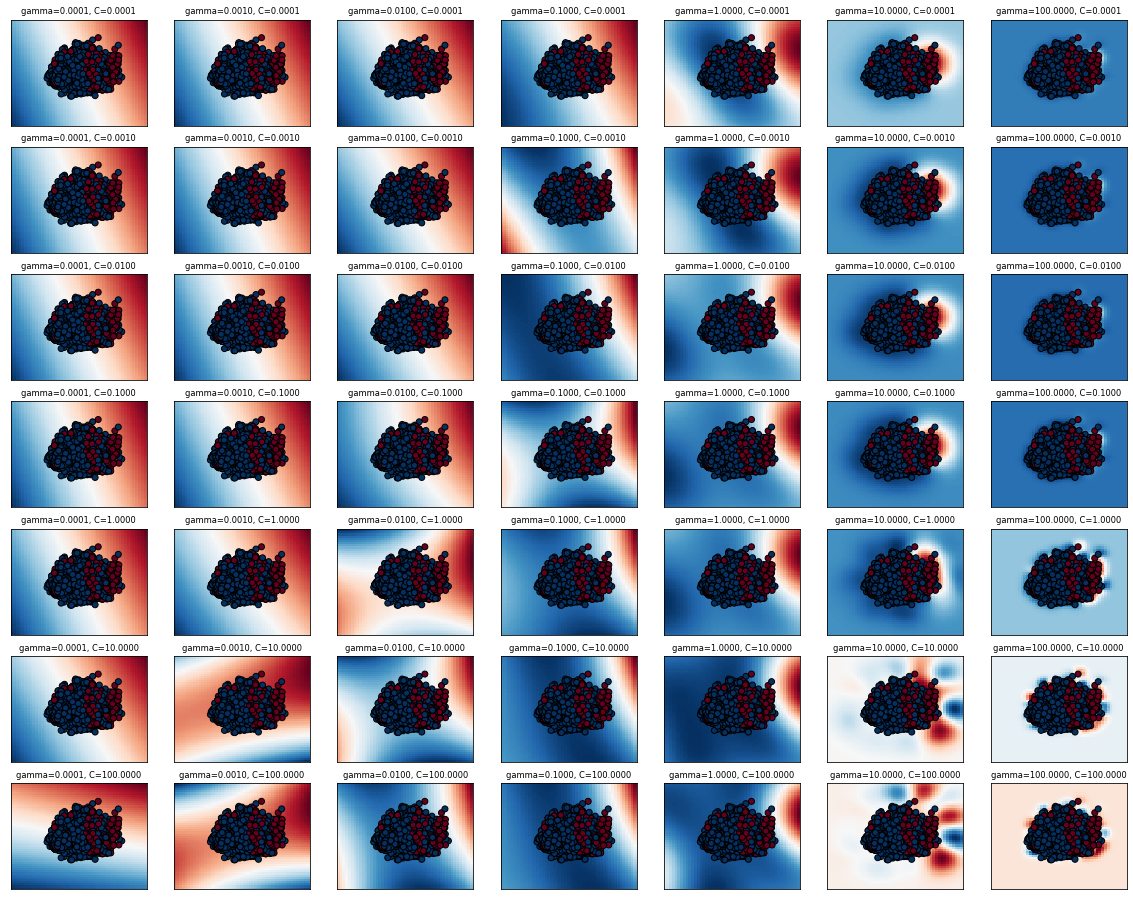

In [51]:
plt.figure(figsize=(20, 16))
xx, yy = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=%0.4f, C=%0.4f" % ((gamma), (C)),
              size='small')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy,-Z, cmap=plt.cm.RdBu)
    plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_train, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid1rbf.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

In [52]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.(Our POI is our best accuracy score)
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

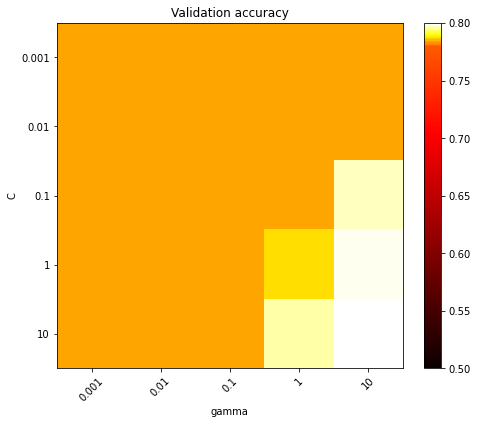

In [60]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.5, midpoint=0.78))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

it seems that the C regularization below zero doesn't make a much of on affect on our decision boundaries -> essential affect begins to happen at 0.1 

In [145]:
df_feat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [152]:
col1=df.columns[:-1]

In [153]:
col1

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

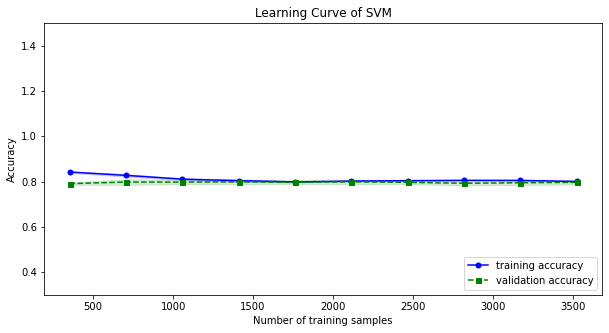

In [61]:
#Learning curve of the SVC with the optimal hyperparameters using our first parameters found
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(kernel='rbf', probability=True, degree = 3, 
                                                                        C=10, gamma = 10.0, random_state = 42), 
                                                       X=pca_x, y = y_train, 
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10, n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, 
        label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.title('Learning Curve of SVM')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.3, 1.5])
plt.show()

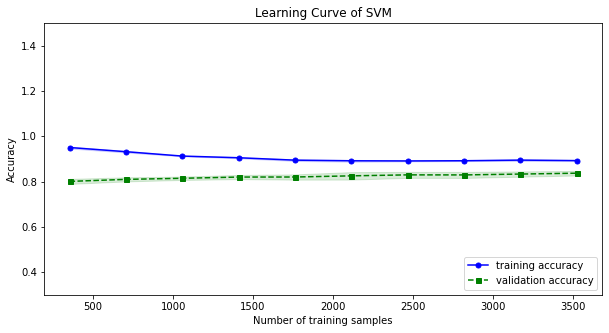

In [159]:
#Learning curve of the SVC with the optimal hyperparameters using our first parameters found
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(kernel='rbf', probability=True, degree = 3, 
                                                                        C=10, gamma = 10.0, random_state = 42), 
                                                       X=x_train, y = y_train, 
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10, n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, 
        label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.title('Learning Curve of SVM')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.3, 1.5])
plt.show()

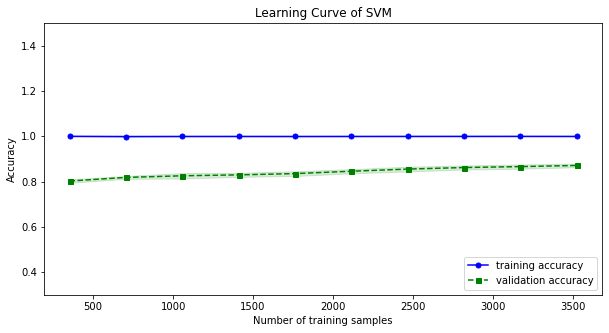

In [160]:
#Learning curve of the SVC with the optimal hyperparameters using our parameters found with PCA
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(kernel='rbf', probability=True, degree = 3, 
                                                                        C=10, gamma = 100.0, random_state = 42), 
                                                       X=x_train, y = y_train, 
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10, n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, 
        label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.title('Learning Curve of SVM')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.3, 1.5])
plt.show()

Parameters set using PCA seemed to perform well for both our Training and validation: exceeding our expectations with the accuracy of training set. lets now examine if we use oversampling SmOTE will make a difference for our SVM model before testing

In [165]:
x_smote_train, y_smote_train = oversample.fit_resample(x_train,y_train)

In [62]:
x_smote_train.shape

(6144, 11)

In [63]:
y_smote_train.shape

(6144,)

In [64]:
x_smote_train=x_smote_train.astype('float32')
y_smote_train=y_smote_train.astype('int64')

In [65]:
start=time.time()
C_range = [0.001, 0.01, 0.1 ,1 ,10]
kernels_range = ['linear', 'rbf' , 'poly']
gamma_range = [0.001, 0.01, 0.1 ,1 ,10]
param_grid = dict(gamma=gamma_range, C=C_range, kernel= kernels_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
gridS = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
gridS.fit(x_smote_train, y_smote_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridS.best_params_, gridS.best_score_))
print('It took', time.time()-start, 'seconds.')

The best parameters are {'C': 10, 'gamma': 10, 'kernel': 'rbf'} with a score of 0.86
It took 1045.7996470928192 seconds.


**Using RBF kernel only**

In [68]:
start=time.time()
C_range = [0.001,0.01,0.1,1,10]
gamma_range = [0.001,0.01,0.1,1,10]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
gridSrbf = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
gridSrbf.fit(x_smote_train, y_smote_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridSrbf.best_params_, gridSrbf.best_score_))
print('It took', time.time()-start, 'seconds.')

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.86
It took 297.60174202919006 seconds.


In [70]:
scores = gridSrbf.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

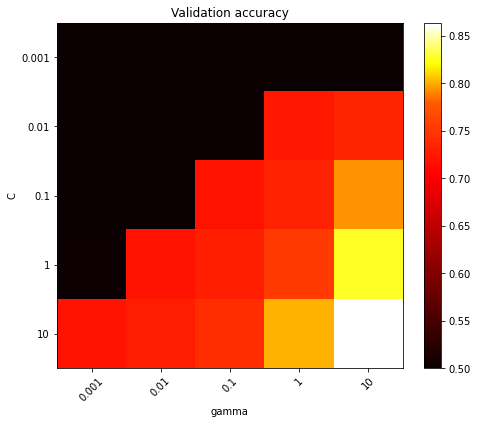

In [86]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.5, midpoint=0.78))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

Oversampling slightly performed better we find the PCA slightly affected our model with 80% accuracy, using the data itself with the RBF kernel provided 83% and using the oversampling dataset provided 86% Accuracy

Comparing Parameters from trained models

In [106]:
#General model used standard xtrain and ytrain to train our models
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.82


In [107]:
#Used PCA analysis to train and visualise our model
print("The best parameters are %s with a score of %0.2f"
      % (grid1rbf.best_params_, grid1rbf.best_score_))

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.80


In [108]:
#used our oversampled data and still was got the same parameters to be used with the highest Accuracy score
print("The best parameters are %s with a score of %0.2f"
      % (gridSrbf.best_params_, gridSrbf.best_score_))

The best parameters are {'C': 10, 'gamma': 10} with a score of 0.86


We will set our C regularisation to 10 and our gamma to 10 to build our model and use the Oversampled dataset to train our classification model

We will save our Final SVM parameters for testing 

In [159]:
clfsvm = SVC(kernel='rbf', probability=True, C=10, gamma=10, random_state=63)

In [156]:
#Save our final Model 
Filename = "FinalSVM"
pickle.dump(clfsvm, open(Filename, 'wb'))

# Load model for testing

In [157]:
#Load the final SVM Model
Loaded_svm = pickle.load(open(Filename, 'rb'))

# Lets now TEST our SVM

In [160]:
Loaded_svm.fit(x_smote_train, y_smote_train)

SVC(C=10, gamma=10, probability=True, random_state=63)

In [161]:
Loaded_svm.score(x_test, y_test)

0.7765306122448979

In [119]:
y_pred = Loaded_svm.predict(x_test)
print('Classification Report \n',classification_report(y_test,y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       766
           1       0.46      0.12      0.19       214

    accuracy                           0.78       980
   macro avg       0.63      0.54      0.53       980
weighted avg       0.72      0.78      0.72       980



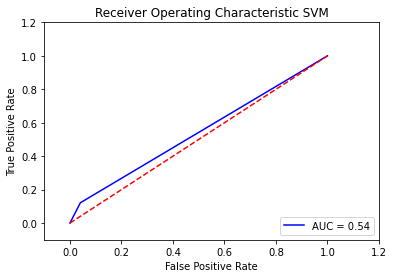

In [125]:
#Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix SVM
 [[735  31]
 [188  26]]

Normalized confusion matrix SVM
[[0.95953003 0.04046997]
 [0.87850467 0.12149533]]


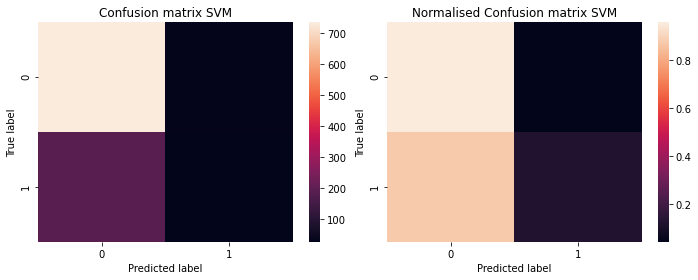

In [127]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix SVM\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix SVM')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix SVM')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix SVM')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

Lets try with our standard our standard training dataset

In [120]:
clfsvm1 = SVC(kernel='rbf', probability=True, C=10, gamma=10, random_state=63)
clfsvm1.fit(x_train, y_train)

SVC(C=10, gamma=10, probability=True, random_state=63)

In [121]:
clfsvm1.score(x_test, y_test)

0.7877551020408163

In [123]:
y_pred1 = clfsvm1.predict(x_test)
print('Classification Report \n',classification_report(y_test,y_pred1))

Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       766
           1       0.55      0.17      0.26       214

    accuracy                           0.79       980
   macro avg       0.68      0.56      0.57       980
weighted avg       0.75      0.79      0.74       980



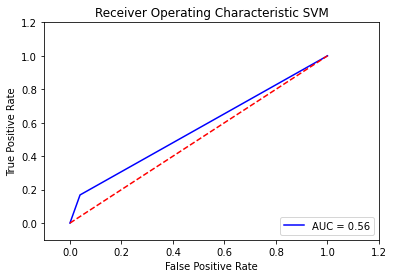

In [126]:
#Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix SVM
 [[736  30]
 [178  36]]

Normalized confusion matrix SVM
[[0.96083551 0.03916449]
 [0.8317757  0.1682243 ]]


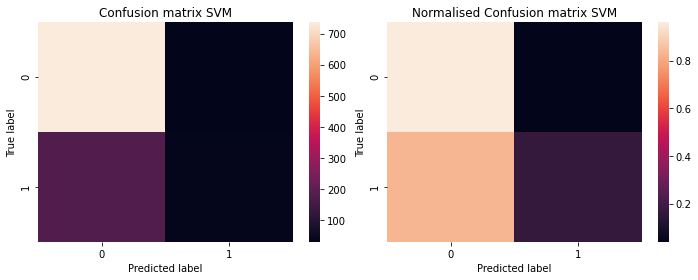

In [128]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test,y_pred1)
print('Confusion Matrix SVM\n',cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nNormalized confusion matrix SVM')
print(cm_normalized)
# Show confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(cm)
plt.title('Confusion matrix SVM')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(122)
sns.heatmap(cm_normalized)
plt.title('Normalised Confusion matrix SVM')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()